# Forecasting Ecommerce Sales in Python

## Load packages and import data

In [1]:
#Locate imported packages
import sys
sys.path

#import pandas and numpy
import pandas as pd
import numpy as np

# From matplotlib, import pyplot under the alias plt
from matplotlib import pyplot as plt

#Import forecasting library Prophet
from prophet import Prophet
from prophet.plot import plot_yearly, plot_forecast_component, add_changepoints_to_plot
from prophet.utilities import regressor_coefficients

In [6]:
#Read data file into object called df
#I'm reading this file directly from the web
df = pd.read_csv("https://raw.githubusercontent.com/PacktPublishing/Forecasting-Time-Series-Data-with-Facebook-Prophet/main/data/online_retail.csv")

print(df.head(5))

         date  total sales
0  2009-12-01  3106.000000
1  2009-12-02  3254.000000
2  2009-12-03  2951.000000
3  2009-12-04  2529.000000
4  2009-12-05  2644.541758


In [7]:
#Transform date to datetime object
df['date'] = pd.to_datetime(df['date'])

In [8]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1104 entries, 0 to 1103
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         1104 non-null   datetime64[ns]
 1   total sales  1104 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 17.4 KB
None


## Data Prep

In [9]:
#Rename columns
df.rename(columns = {'date': 'ds', 'total sales': 'y'},inplace = True)

#Check results of renaming
print(df.columns)

Index(['ds', 'y'], dtype='object')


## Exploratory Data Analysis (EDA)

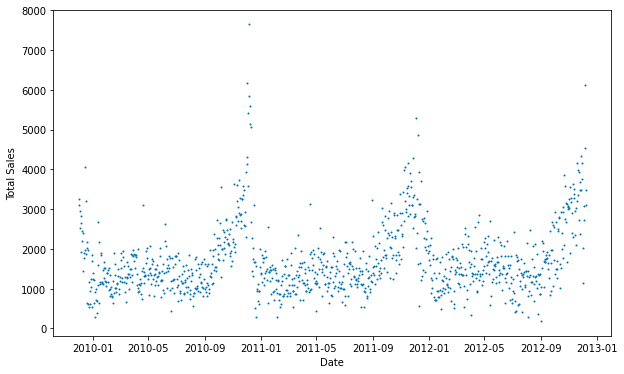

In [10]:
#Number of customers per day
plt.figure(figsize=(10, 6))
plt.scatter(pd.to_datetime(df['ds']), df['y'], s=1, c='#0072B2')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.show()

This is sales data per day.

## Model Fit

In [11]:
#We need to initiate a Prophet object
#m = Prophet(seasonality_mode='multiplicative')
m = Prophet()

#Fit model
m.fit(df)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -27.5194


    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       2443.21   1.01198e-05       46.5821      0.2185           1      139   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     109       2443.21   2.00652e-08        45.286    0.002016           1      159   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


Prophet's default mode for seasonality is additive.

## How did Prophet handle the data

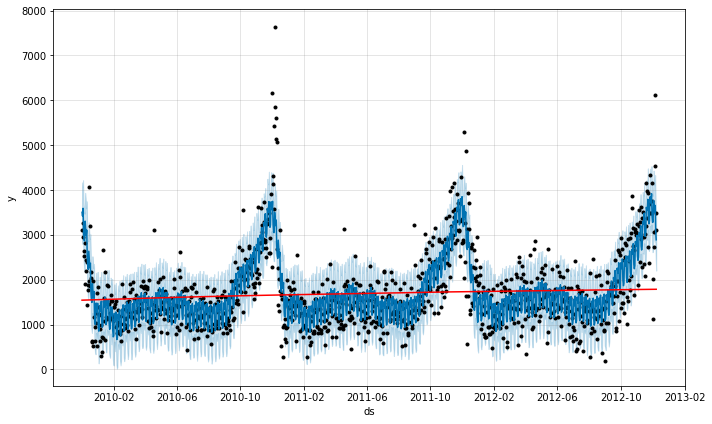

In [13]:
#Create forecast using predict function - if no future dataframe is created then the
#predict function will simply predict values on the historical data that was fit in
#the model
#We just want to see how Prophet handeled seasonality
forecast = m.predict()


fig = m.plot(forecast)
add_changepoints_to_plot(fig.gca(), m, forecast)
plt.show()

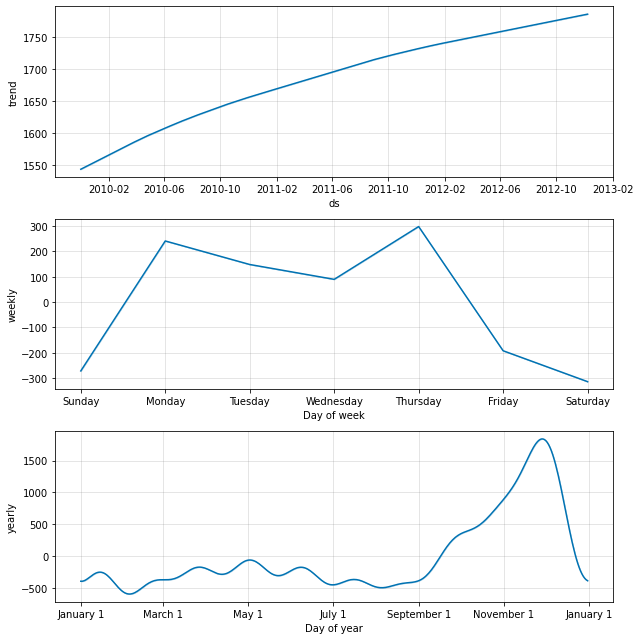

In [14]:
#Components plot
fig2 = m.plot_components(forecast)

There are 3 components: Trend, Weekly, and Yearly. If you have a dataset that has at least two years of data, Prophet will automatically detect and isolate yearly seasonality components. You need at least two weeks of data for weekly seasonality to be included. 

Trend shows that demand has been increasing linearly since 2010. The weekly trend shows that demand is highest on Mondays and Thursdays.  The yearly trend is very wavy showing high peak demand in December. 

Fourier series is how seasonality is controlled.

## Create Future Forecast

In [16]:
#Make future dataframe 
#Period equals 365 days times 1
future = m.make_future_dataframe(periods=365 * 1)
future_forecast = m.predict(future)

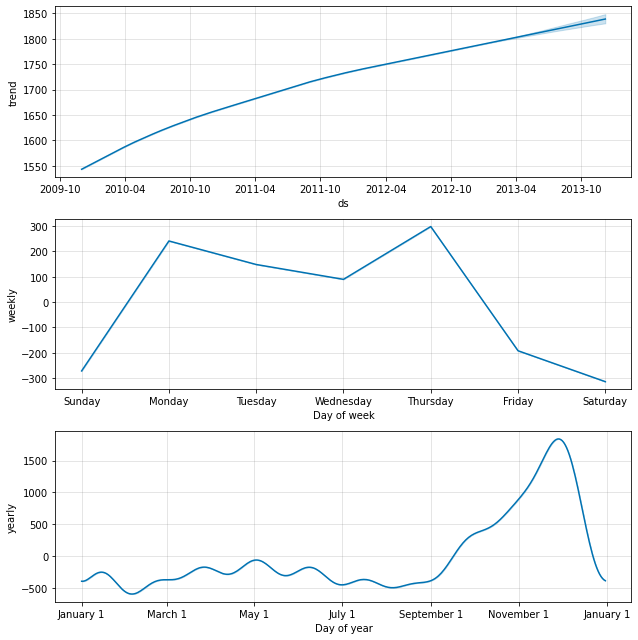

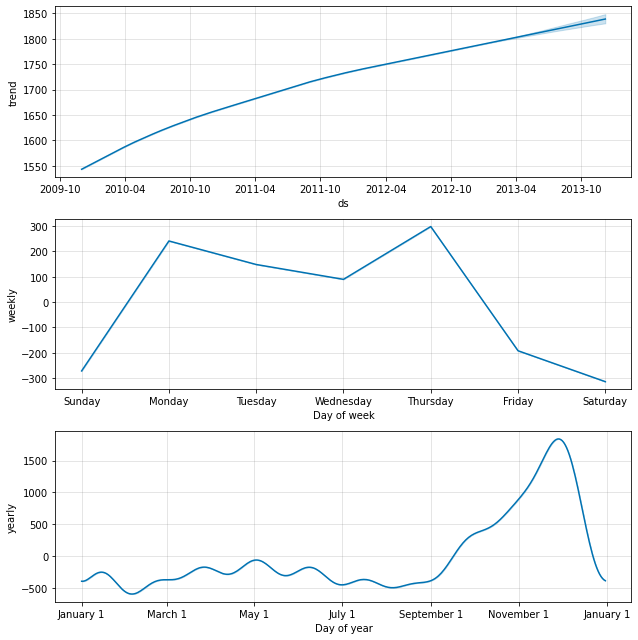

In [17]:
m.plot_components(future_forecast)

Sales have been steadily incrasing since 2010. Weekly seasonality reflects lower sales on Friday, Saturday and Sunday compared to the rest of the week with peak sales happening on Thursdays.
Yearly seasonality shows a spike of sales in December coinciding with the holiday shopping season.

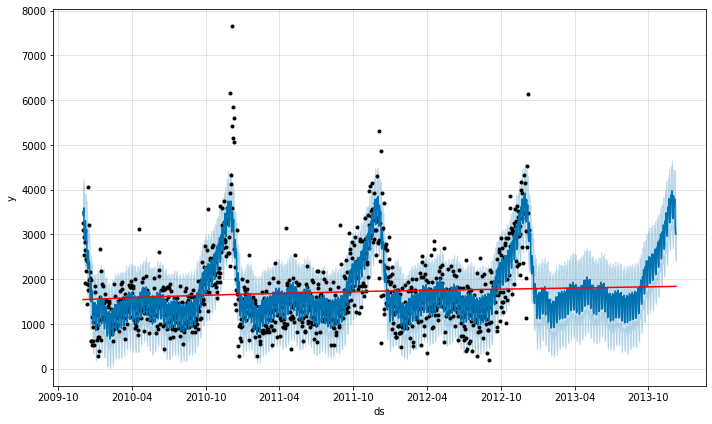

In [19]:
#Plot forecast
fig2 = m.plot(future_forecast)
add_changepoints_to_plot(fig2.gca(), m, future_forecast)
plt.show()

# Model Performance

In [22]:
from prophet.diagnostics import cross_validation

Horizon is the length of time to evaluate the forecast (the time we want to predict).

Initial is the first training period (which the data will be trained on).

Period is the amount of time between each fold.

Cutoffs are the dates where each horizon will begin. Not really necessary.


In [23]:
df_cv = cross_validation(m,
                         horizon='90 days',
                         period='30 days',
                         initial='730 days',
                        parallel='processes')

INFO:prophet:Making 10 forecasts with cutoffs between 2011-12-14 00:00:00 and 2012-09-09 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f81aabc0190>


Initial log joint probability = -12.0026
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      76       1700.33    0.00188245       278.036   1.869e-05       0.001      130  LS failed, Hessian reset 
      99       1701.67    0.00183778       89.1945           1           1      158   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     122       1702.96   0.000288112       88.5975   2.744e-06       0.001      257  LS failed, Hessian reset 
Initial log joint probability = -12.0658
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       1703.49   6.45898e-07       52.2939        2.08       0.208      366   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1848.32     0.0161521       112.255           1           1      124   
    Iter      log prob        ||dx||      ||grad||       alpha     

     211       2207.92    3.2859e-07       57.0692       0.246       0.246      316   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance
      66       2275.91   0.000267178       95.3412   1.601e-06       0.001      116  LS failed, Hessian reset 
      99       2277.56    0.00499783       130.691      0.2919      0.9635      160   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     176       2278.04   2.35239e-05       77.8359   3.562e-07       0.001      308  LS failed, Hessian reset 
     199       2278.05   3.31639e-05       60.0819           1           1      345   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     246       2278.09   1.21687e-05        51.072   1.772e-07       0.001      441  LS failed, Hessian reset 
     284       2278.09   1.42542e-07       59.1739      0.2481           1      495   
Optimization terminated norma

In [24]:
#Print cross-validated df
print(df_cv.head())

          ds         yhat   yhat_lower   yhat_upper            y     cutoff
0 2011-12-15  2626.901172  1988.575917  3292.776972  3702.986147 2011-12-14
1 2011-12-16  2092.322583  1437.618066  2721.847428  1229.263629 2011-12-14
2 2011-12-17  1838.482533  1186.677007  2496.434420  1325.415023 2011-12-14
3 2011-12-18  1740.905971  1157.810238  2396.000805  2739.454215 2011-12-14
4 2011-12-19  2135.509080  1483.141094  2781.052793  2699.823386 2011-12-14


In [25]:
from prophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p.head()

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,9 days,255875.575801,505.841453,410.891128,0.330864,0.245005,0.279850,0.811111
1,10 days,274034.605690,523.483147,421.155488,0.337011,0.264438,0.286516,0.822222
2,11 days,270511.227497,520.106939,415.147235,0.325506,0.226754,0.281314,0.833333
3,12 days,262318.118866,512.170010,411.811395,0.320850,0.226754,0.279830,0.822222
4,13 days,254325.279495,504.306732,404.534587,0.307771,0.213014,0.272923,0.811111


/opt/anaconda3/lib/python3.9/site-packages/prophet/plot.py:539: FutureWarning: casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  x_plt = df_none['horizon'].astype('timedelta64[ns]').astype(np.int64) / float(dt_conversions[i])
/opt/anaconda3/lib/python3.9/site-packages/prophet/plot.py:540: FutureWarning: casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  x_plt_h = df_h['horizon'].astype('timedelta64[ns]').astype(np.int64) / float(dt_conversions[i])


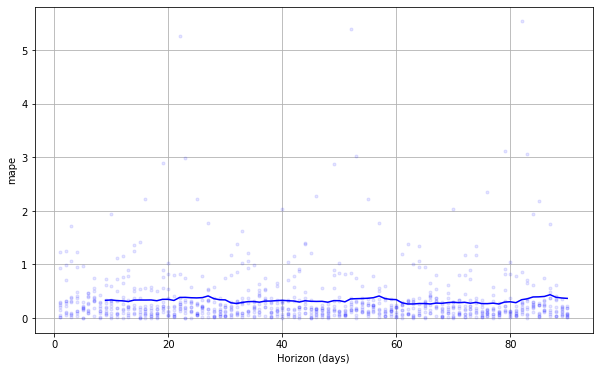

In [26]:
from prophet.plot import plot_cross_validation_metric
fig3 = plot_cross_validation_metric(df_cv, metric='mape')


Cross validation performance metrics can be visualized with plot_cross_validation_metric, here shown for MAPE. Dots show the absolute percent error for each prediction in df_cv. The blue line shows the MAPE, where the mean is taken over a rolling window of the dots.

In [27]:
import itertools
param_grid = {  
    'changepoint_prior_scale': [0.001, 0.01, 0.1, 0.5],
    'seasonality_prior_scale': [0.01, 0.1, 1.0, 10.0],
}

# Generate all combinations of parameters
all_params = [dict(zip(param_grid.keys(), v)) for v in itertools.product(*param_grid.values())]
rmses = []  # Store the RMSEs for each params here

# Use cross validation to evaluate all parameters
for params in all_params:
    m = Prophet(**params).fit(df)  # Fit model with given params
    df_cv = cross_validation(m, horizon='30 days', parallel="processes")
    df_p = performance_metrics(df_cv, rolling_window=1)
    rmses.append(df_p['rmse'].values[0])

# Find the best parameters
tuning_results = pd.DataFrame(all_params)
tuning_results['rmse'] = rmses
print(tuning_results)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Making 48 forecasts with cutoffs between 2010-12-04 00:00:00 and 2012-11-08 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f81ac24da30>


Initial log joint probability = -27.5194
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      39       2313.59    0.00178539       4891.91   3.508e-07       0.001       88  LS failed, Hessian reset 
      99       2362.76   0.000672352       4916.54      0.8126      0.8126      162   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     140       2363.69   5.98603e-09       4687.42      0.5495      0.5495      217   
Optimization terminated normally: 
  Convergence detected: absolute parameter change was below tolerance
Initial log joint probability = -7.92698
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       750.761   1.44054e-06       5064.04      0.7644      0.7644      126   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     125        750.77   6.97069e-09       4442.65      0.5428      0.542

     140       703.384   9.14755e-09       4195.56      0.8786      0.8786      221   
Optimization terminated normally: 
  Convergence detected: absolute parameter change was below tolerance
Initial log joint probability = -8.50124
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
       1      -8.50124             0       381.277       1e-12       0.001       21   
Optimization terminated with error: 
  Line search failed to achieve a sufficient decrease, no more progress can be made

Initial log joint probability = -115.449
Iteration  1. Log joint probability =    146.131. Improved by 258.204.
Iteration  1. Log joint probability =    334.709. Improved by 450.157.
Iteration  2. Log joint probability =    504.221. Improved by 358.09.
Iteration  2. Log joint probability =    614.634. Improved by 279.926.
Iteration  3. Log joint probability =    682.783. Improved by 178.562.
Iteration  3. Log joint probability =    766.889. Improved by 152.255.


Iteration 49. Log joint probability =    763.874. Improved by 1.00487e-05.
Iteration 46. Log joint probability =    793.573. Improved by 9.49854e-09.
Iteration 50. Log joint probability =    763.874. Improved by 8.8227e-05.
Iteration 51. Log joint probability =    763.874. Improved by 2.71678e-05.
Iteration 52. Log joint probability =    763.874. Improved by 8.91352e-05.
Iteration 53. Log joint probability =    763.874. Improved by 1.22782e-05.
Iteration 54. Log joint probability =    763.874. Improved by 0.000116734.
Iteration 55. Log joint probability =    763.874. Improved by 0.000332516.
Iteration 56. Log joint probability =    763.875. Improved by 0.000161167.
Iteration 57. Log joint probability =    763.875. Improved by 6.34377e-05.
Iteration 58. Log joint probability =    763.875. Improved by 3.51149e-06.
Iteration 59. Log joint probability =    763.875. Improved by 1.36461e-05.
Iteration 60. Log joint probability =    763.875. Improved by 4.13847e-05.
Iteration 61. Log joint pr

Iteration  1. Log joint probability =     360.92. Improved by 593.355.
Iteration  2. Log joint probability =    709.415. Improved by 348.495.
Iteration  3. Log joint probability =      917.8. Improved by 208.384.
Iteration  4. Log joint probability =    1034.43. Improved by 116.63.
Iteration  5. Log joint probability =    1038.06. Improved by 3.63061.
Iteration  6. Log joint probability =    1042.59. Improved by 4.53174.
Initial log joint probability = -8.52032
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
Iteration  7. Log joint probability =    1046.88. Improved by 4.28586.
      99       1100.87   4.45104e-06       4988.76      0.6284      0.6284      129   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     198       1110.19   8.25629e-09       4520.87      0.2695      0.2695      254   
Optimization terminated normally: 
  Convergence detected: absolute parameter change was below tolerance


Initial log joint probability = -8.92664
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      77       1320.99    0.00055227       4887.81   1.111e-07       0.001      131  LS failed, Hessian reset 
      99       1327.37   4.85566e-05       4898.79      0.3765           1      157   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     145        1327.8   4.67333e-09       4975.47      0.5119      0.5119      216   
Optimization terminated normally: 
  Convergence detected: absolute parameter change was below tolerance
Initial log joint probability = -12.3236
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1297.19   9.54663e-07       4884.86           1           1      126   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     135       1359.61      0.011024        4930.2   1.937e-06       0.00

Iteration  1. Log joint probability =    536.363. Improved by 950.493.
Iteration  2. Log joint probability =    1012.68. Improved by 476.316.
Iteration  3. Log joint probability =    1259.79. Improved by 247.106.
Iteration  4. Log joint probability =    1436.68. Improved by 176.891.
Iteration  5. Log joint probability =    1472.83. Improved by 36.1542.
Iteration  6. Log joint probability =    1497.61. Improved by 24.7777.
Initial log joint probability = -23.5799
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
       1      -23.5799             0       725.564       1e-12       0.001       26   
Optimization terminated with error: 
  Line search failed to achieve a sufficient decrease, no more progress can be made

Initial log joint probability = -433.777


Iteration  7. Log joint probability =    1504.46. Improved by 6.85041.
Initial log joint probability = -32.6239
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
       1      -32.6239             0       751.627       1e-12       0.001       23   
Optimization terminated with error: 
  Line search failed to achieve a sufficient decrease, no more progress can be made

Initial log joint probability = -456.605


Iteration  1. Log joint probability =    575.904. Improved by 1009.68.
Iteration  8. Log joint probability =    1509.15. Improved by 4.69501.
Iteration  1. Log joint probability =     489.44. Improved by 946.045.
Iteration  2. Log joint probability =    681.194. Improved by 105.29.
Iteration  9. Log joint probability =     1513.6. Improved by 4.44482.
Iteration  2. Log joint probability =    1042.73. Improved by 553.288.
Iteration 10. Log joint probability =    1516.41. Improved by 2.81486.
Iteration  3. Log joint probability =    1405.59. Improved by 724.4.
Iteration  3. Log joint probability =    1423.95. Improved by 381.225.
Iteration 11. Log joint probability =    1517.48. Improved by 1.07114.
Iteration  4. Log joint probability =    1526.43. Improved by 120.833.
Iteration 12. Log joint probability =    1517.87. Improved by 0.387754.
Iteration  5. Log joint probability =    1528.94. Improved by 2.51278.
Iteration  4. Log joint probability =    1565.66. Improved by 141.707.
Iteratio

Iteration  8. Log joint probability =     1545.5. Improved by 1.86213.
Iteration 15. Log joint probability =    1521.54. Improved by 1.08141.
Iteration  7. Log joint probability =    1571.02. Improved by 2.33629.
Iteration  1. Log joint probability =    562.708. Improved by 1020.46.
Iteration  9. Log joint probability =    1545.51. Improved by 0.0118963.
Iteration 16. Log joint probability =    1522.17. Improved by 0.633583.
Iteration  8. Log joint probability =    1578.62. Improved by 7.5998.
Iteration 10. Log joint probability =    1545.69. Improved by 0.180775.
Iteration 17. Log joint probability =    1522.37. Improved by 0.192854.
Iteration  2. Log joint probability =    1057.19. Improved by 494.484.
Iteration  9. Log joint probability =    1578.64. Improved by 0.0172868.
Iteration 11. Log joint probability =    1545.78. Improved by 0.0867481.
Iteration 18. Log joint probability =    1522.47. Improved by 0.102808.
Iteration 10. Log joint probability =    1579.02. Improved by 0.3811

Iteration 36. Log joint probability =    1580.11. Improved by 1.13877e-05.
Iteration 44. Log joint probability =    1522.74. Improved by 4.71236e-07.
Iteration 37. Log joint probability =    1545.98. Improved by 1.02352e-06.
Iteration 27. Log joint probability =    1585.01. Improved by 0.000286849.
Iteration 37. Log joint probability =    1580.11. Improved by 1.32216e-05.
Iteration 45. Log joint probability =    1522.74. Improved by 8.65577e-08.
Iteration 38. Log joint probability =    1545.98. Improved by 1.39817e-06.
Iteration 28. Log joint probability =    1585.01. Improved by 0.000391247.
Iteration 38. Log joint probability =    1580.11. Improved by 7.81358e-07.
Iteration 46. Log joint probability =    1522.74. Improved by 2.31624e-07.
Iteration 39. Log joint probability =    1545.98. Improved by 1.10274e-06.
Iteration 29. Log joint probability =    1585.01. Improved by 0.000301161.
Iteration 39. Log joint probability =    1580.11. Improved by 7.96971e-06.
Iteration 47. Log joint p

Initial log joint probability = -12.9086
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      90       1799.94   2.81888e-09       4767.22      0.2609      0.2609      114   
Optimization terminated normally: 
  Convergence detected: absolute parameter change was below tolerance
Initial log joint probability = -14.0803
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
Initial log joint probability = -12.0746
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      76       1844.23   0.000702138       5002.18   1.353e-07       0.001      141  LS failed, Hessian reset 
Initial log joint probability = -12.4456
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99        1849.4   5.91714e-05       5034.28           1           1      170   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # 

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Making 48 forecasts with cutoffs between 2010-12-04 00:00:00 and 2012-11-08 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f81ac119a00>


Initial log joint probability = -27.5194
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      94       2407.84    0.00434874       4594.07   1.017e-06       0.001      152  LS failed, Hessian reset 
      99        2420.9    0.00102671       4490.31           1           1      157   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     137       2431.36   5.82337e-05       4313.59   1.218e-08       0.001      245  LS failed, Hessian reset 
     177       2431.88   9.00194e-09       4815.06      0.4491      0.4491      299   
Optimization terminated normally: 
  Convergence detected: absolute parameter change was below tolerance
Initial log joint probability = -8.50124
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
       1      -8.50124             0       381.277       1e-12       0.001       21   
Optimization terminated with error: 
  Line search fai

Initial log joint probability = -18.9095
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
       1      -18.9095             0        376.05       1e-12       0.001       21   
Optimization terminated with error: 
  Line search failed to achieve a sufficient decrease, no more progress can be made

Initial log joint probability = -171.94
Iteration  2. Log joint probability =    505.682. Improved by 161.773.


Iteration  1. Log joint probability =    287.023. Improved by 458.963.
Initial log joint probability = -7.92698
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       801.529   7.87195e-07       5064.23      0.2488      0.2488      136   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
Iteration  3. Log joint probability =    775.383. Improved by 269.701.
     199       861.798   0.000580753       5108.98       0.825       0.825      248   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
Iteration  2. Log joint probability =    320.229. Improved by 33.2058.
     235        881.75   0.000129003       5046.36   2.545e-08       0.001      328  LS failed, Hessian reset 
     276       882.171   2.29195e-07       5034.58   4.536e-11       0.001      424  LS failed, Hessian reset 
     283       882.171   1.09728e-09       5056.68      0.1322      0.1322

Iteration 43. Log joint probability =    841.639. Improved by 5.63645e-07.
Iteration 38. Log joint probability =    827.425. Improved by 0.00594027.
Iteration 44. Log joint probability =    841.639. Improved by 1.80063e-07.
Iteration 39. Log joint probability =    827.428. Improved by 0.00211694.
Iteration 45. Log joint probability =    841.639. Improved by 7.8138e-08.
Iteration 40. Log joint probability =    827.433. Improved by 0.00587024.
Iteration 46. Log joint probability =    841.639. Improved by 1.22638e-07.
Iteration 41. Log joint probability =    827.436. Improved by 0.00212316.
Iteration 47. Log joint probability =    841.639. Improved by 6.6741e-08.
Iteration 42. Log joint probability =    827.441. Improved by 0.00580047.
Iteration 48. Log joint probability =    841.639. Improved by 3.82647e-09.
Iteration 43. Log joint probability =    827.443. Improved by 0.00212963.
Iteration 44. Log joint probability =    827.449. Improved by 0.00573097.
Iteration 45. Log joint probabilit

Iteration 99. Log joint probability =    827.642. Improved by 0.00247729.
Iteration  1. Log joint probability =    434.127. Improved by 726.429.
Iteration 100. Log joint probability =    827.646. Improved by 0.00380485.
Iteration 101. Log joint probability =    827.648. Improved by 0.00250691.
Iteration  2. Log joint probability =    755.488. Improved by 321.362.
Iteration 102. Log joint probability =    827.652. Improved by 0.00372553.
Iteration  3. Log joint probability =    987.365. Improved by 231.877.
Iteration 103. Log joint probability =    827.654. Improved by 0.00253674.
Iteration 104. Log joint probability =    827.658. Improved by 0.00364641.
Iteration  4. Log joint probability =    1098.07. Improved by 110.701.
Initial log joint probability = -8.52032
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
Iteration 105. Log joint probability =    827.661. Improved by 0.00256676.
      99       1183.62   2.55225e-07       5056.72         

Iteration 147. Log joint probability =    827.781. Improved by 0.00336107.
Iteration 44. Log joint probability =    1118.72. Improved by 6.08386e-08.
Iteration 148. Log joint probability =    827.782. Improved by 0.00182797.
Iteration 45. Log joint probability =    1118.72. Improved by 6.07542e-09.
Iteration 149. Log joint probability =    827.786. Improved by 0.00340519.
Iteration 150. Log joint probability =    827.787. Improved by 0.00174294.
Iteration 151. Log joint probability =    827.791. Improved by 0.00344947.
Iteration 152. Log joint probability =    827.793. Improved by 0.00165809.
Iteration 153. Log joint probability =    827.796. Improved by 0.00349392.
Iteration 154. Log joint probability =    827.798. Improved by 0.00157339.
Iteration 155. Log joint probability =    827.801. Improved by 0.00353852.
Iteration 156. Log joint probability =    827.803. Improved by 0.00148886.
Iteration 157. Log joint probability =    827.806. Improved by 0.00358329.
Iteration 158. Log joint 

Iteration 213. Log joint probability =    827.913. Improved by 0.000423977.
      99       1436.83      0.021068       5018.79      0.1796           1      116   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     156       1458.29   2.85237e-09       4943.46      0.1231      0.1231      190   
Optimization terminated normally: 
  Convergence detected: absolute parameter change was below tolerance
Iteration 214. Log joint probability =    827.913. Improved by 0.000114404.
Iteration 215. Log joint probability =    827.914. Improved by 0.000424652.
Iteration 216. Log joint probability =    827.914. Improved by 0.000113203.
Iteration 217. Log joint probability =    827.914. Improved by 0.000425327.
Iteration 218. Log joint probability =    827.914. Improved by 0.000112002.
Iteration 219. Log joint probability =    827.915. Improved by 0.000426003.
Iteration 220. Log joint probability =    827.915. Improved by 0.000110801.
Iteration 221. Log jo

Iteration 246. Log joint probability =    827.922. Improved by 9.5214e-05.
Iteration  1. Log joint probability =    615.478. Improved by 1089.47.
Iteration 247. Log joint probability =    827.922. Improved by 0.000435487.
Iteration 248. Log joint probability =    827.922. Improved by 9.40168e-05.
Iteration  2. Log joint probability =    773.292. Improved by 157.814.
Iteration 249. Log joint probability =    827.923. Improved by 0.000436166.
Iteration 250. Log joint probability =    827.923. Improved by 9.28199e-05.
Iteration  3. Log joint probability =    1414.47. Improved by 641.182.
Iteration 251. Log joint probability =    827.923. Improved by 0.000436846.
Iteration  4. Log joint probability =    1578.93. Improved by 164.46.
Iteration 252. Log joint probability =    827.923. Improved by 9.16233e-05.
Iteration 253. Log joint probability =    827.924. Improved by 0.000437526.
Iteration  5. Log joint probability =    1580.71. Improved by 1.78065.
Iteration 254. Log joint probability = 


Initial log joint probability = -493.645
Iteration 10. Log joint probability =    1588.42. Improved by 0.150695.
Iteration 262. Log joint probability =    827.926. Improved by 8.56438e-05.
Iteration 263. Log joint probability =    827.927. Improved by 0.00044093.
Iteration  1. Log joint probability =    -10.102. Improved by 483.542.
Iteration 11. Log joint probability =    1588.48. Improved by 0.06377.
Iteration 264. Log joint probability =    827.927. Improved by 8.44487e-05.
Initial log joint probability = -32.6239
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
       1      -32.6239             0       751.627       1e-12       0.001       23   
Optimization terminated with error: 
  Line search failed to achieve a sufficient decrease, no more progress can be made

Initial log joint probability = -516.473
Iteration 12. Log joint probability =    1588.49. Improved by 0.00712854.
Iteration  2. Log joint probability =    705.666. Improved b

Iteration 265. Log joint probability =    827.927. Improved by 0.000441611.
Iteration 266. Log joint probability =    827.927. Improved by 8.32539e-05.
Iteration  1. Log joint probability =    589.705. Improved by 1106.18.
Iteration 13. Log joint probability =    1588.53. Improved by 0.039786.
Iteration  3. Log joint probability =    865.868. Improved by 160.201.
Iteration 267. Log joint probability =    827.928. Improved by 0.000442293.
Iteration 268. Log joint probability =    827.928. Improved by 8.20593e-05.
Iteration 14. Log joint probability =    1588.55. Improved by 0.0195182.
Iteration  2. Log joint probability =    1060.13. Improved by 470.429.
Iteration  4. Log joint probability =    870.994. Improved by 5.12611.
Iteration 269. Log joint probability =    827.928. Improved by 0.000442975.
Iteration 15. Log joint probability =    1588.55. Improved by 0.000546775.
Iteration 270. Log joint probability =    827.928. Improved by 8.08649e-05.
Iteration  3. Log joint probability =   

Iteration 306. Log joint probability =    827.938. Improved by 9.44951e-05.
Iteration 37. Log joint probability =    1588.58. Improved by 6.83605e-05.
Iteration 26. Log joint probability =    1647.82. Improved by 0.000643085.
Iteration 307. Log joint probability =    827.938. Improved by 0.000419689.
Iteration 24. Log joint probability =    958.431. Improved by 3.848.
Iteration 308. Log joint probability =    827.938. Improved by 9.57208e-05.
Iteration 38. Log joint probability =    1588.58. Improved by 4.2178e-07.
Iteration 27. Log joint probability =    1647.82. Improved by 0.000169924.
Iteration 309. Log joint probability =    827.938. Improved by 0.000417961.
Iteration 25. Log joint probability =    960.205. Improved by 1.77469.
Iteration 39. Log joint probability =    1588.58. Improved by 3.51525e-06.
Iteration 310. Log joint probability =    827.939. Improved by 9.69467e-05.
Iteration 28. Log joint probability =    1647.82. Improved by 0.000122546.
Iteration 311. Log joint probab

Iteration 60. Log joint probability =    1588.58. Improved by 2.5015e-06.
Iteration 346. Log joint probability =    827.948. Improved by 0.000119056.
Iteration 48. Log joint probability =    1614.34. Improved by 0.15266.
Iteration 347. Log joint probability =    827.948. Improved by 0.000385174.
Iteration 61. Log joint probability =    1588.58. Improved by 2.07495e-06.
Iteration 49. Log joint probability =    1614.35. Improved by 0.00814931.
Iteration 348. Log joint probability =    827.948. Improved by 0.000120287.
Iteration 349. Log joint probability =    827.949. Improved by 0.000383451.
Iteration 62. Log joint probability =    1588.58. Improved by 1.64121e-06.
Iteration 50. Log joint probability =    1614.36. Improved by 0.0174831.
Iteration 350. Log joint probability =    827.949. Improved by 0.000121517.
Iteration 51. Log joint probability =    1614.37. Improved by 0.00773648.
Iteration 63. Log joint probability =    1588.58. Improved by 9.98376e-07.
Iteration 351. Log joint prob

Iteration 378. Log joint probability =    827.956. Improved by 0.000138775.
Iteration 70. Log joint probability =    1614.63. Improved by 0.00272773.
Iteration 379. Log joint probability =    827.956. Improved by 0.000357633.
Iteration  1. Log joint probability =    653.782. Improved by 1171.4.
Iteration 380. Log joint probability =    827.956. Improved by 0.00014001.
Iteration 71. Log joint probability =    1614.63. Improved by 0.00308992.
Iteration 381. Log joint probability =    827.957. Improved by 0.000355914.
Iteration  2. Log joint probability =    1129.29. Improved by 475.509.
Iteration 72. Log joint probability =    1614.64. Improved by 0.00309748.
Iteration 382. Log joint probability =    827.957. Improved by 0.000141244.
Iteration 383. Log joint probability =    827.957. Improved by 0.000354195.
Iteration  3. Log joint probability =    1495.89. Improved by 366.602.
Iteration 73. Log joint probability =    1614.64. Improved by 0.00335866.
Iteration 384. Log joint probability 

Iteration 425. Log joint probability =    827.967. Improved by 0.00035844.
      99       1669.61   4.26827e-07        5071.4           1           1      123   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     114       1669.61   7.66828e-09       4399.43      0.3371      0.3371      142   
Optimization terminated normally: 
  Convergence detected: absolute parameter change was below tolerance
Iteration 27. Log joint probability =    1650.31. Improved by 0.00120007.
Iteration 426. Log joint probability =    827.968. Improved by 0.000127483.
Iteration 101. Log joint probability =    1614.75. Improved by 0.00517029.
Iteration 427. Log joint probability =    827.968. Improved by 0.000358007.
Iteration 28. Log joint probability =    1650.31. Improved by 0.000815336.
Iteration 102. Log joint probability =    1614.75. Improved by 0.00512295.
Iteration 428. Log joint probability =    827.968. Improved by 0.000127559.
Iteration 429. Log joint pr

Iteration 129. Log joint probability =    1614.76. Improved by 3.6666e-06.
Iteration 470. Log joint probability =    827.978. Improved by 9.91281e-05.
Iteration 51. Log joint probability =    1650.34. Improved by 3.48122e-06.
Iteration 471. Log joint probability =    827.979. Improved by 0.000377213.
Iteration 130. Log joint probability =    1614.76. Improved by 2.47334e-06.
Iteration 52. Log joint probability =    1650.34. Improved by 1.76538e-05.
Iteration 472. Log joint probability =    827.979. Improved by 9.61454e-05.
Iteration 131. Log joint probability =    1614.76. Improved by 3.70746e-06.
Iteration 473. Log joint probability =    827.979. Improved by 0.00038049.
Iteration 53. Log joint probability =    1650.34. Improved by 4.37509e-06.
Iteration 474. Log joint probability =    827.979. Improved by 9.24057e-05.
Iteration 132. Log joint probability =    1614.76. Improved by 2.3106e-06.
Iteration 475. Log joint probability =    827.979. Improved by 0.000383767.
Iteration 54. Log 

Iteration 527. Log joint probability =    827.991. Improved by 0.000155764.
      99       1781.99    5.4057e-07       5141.32           1           1      124   
Initial log joint probability = -12.0658
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     102          1782   5.96054e-07       5088.83   1.235e-10       0.001      165  LS failed, Hessian reset 
     123          1782   8.10705e-09       5307.38      0.7035      0.7035      193   
Optimization terminated normally: 
  Convergence detected: absolute parameter change was below tolerance
Iteration 528. Log joint probability =    827.991. Improved by 7.45787e-05.
      90       1817.79   1.68523e-06       4773.06   3.308e-10       0.001      149  LS failed, Hessian reset 
      99        1817.8   2.03065e-07       5119.89      0.4473      0.4473      159   
    Iter      log prob        ||dx|

Iteration 587. Log joint probability =    827.998. Improved by 3.79473e-05.
Iteration 588. Log joint probability =    827.998. Improved by 7.69798e-05.
Iteration 589. Log joint probability =    827.998. Improved by 3.72052e-05.
Iteration 590. Log joint probability =    827.998. Improved by 7.7694e-05.
Iteration 591. Log joint probability =    827.998. Improved by 3.64631e-05.
Iteration 592. Log joint probability =    827.998. Improved by 7.84082e-05.
Initial log joint probability = -12.2585
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
Initial log joint probability = -12.9854
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
Iteration 593. Log joint probability =    827.998. Improved by 3.5721e-05.
      99       1954.22   1.71203e-05       4258.19           1           1      131   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       2038.65   

Iteration 643. Log joint probability =    828.001. Improved by 4.59958e-05.
Iteration 644. Log joint probability =    828.001. Improved by 6.75403e-05.
Iteration 645. Log joint probability =    828.001. Improved by 4.64798e-05.
Iteration 646. Log joint probability =    828.001. Improved by 6.70286e-05.
Initial log joint probability = -12.6136
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
Iteration 647. Log joint probability =    828.001. Improved by 4.69639e-05.
      94        2181.8    3.8058e-09       4884.18      0.1229      0.1229      117   
Optimization terminated normally: 
  Convergence detected: absolute parameter change was below tolerance
Iteration 648. Log joint probability =    828.001. Improved by 6.65168e-05.
Iteration 649. Log joint probability =    828.001. Improved by 4.7448e-05.
Iteration 650. Log joint probability =    828.001. Improved by 6.60051e-05.
Iteration 651. Log joint probability =    828.001. Improved by 4.793

Iteration 707. Log joint probability =    828.004. Improved by 6.15409e-05.
Iteration 708. Log joint probability =    828.004. Improved by 5.0955e-05.
Iteration 709. Log joint probability =    828.005. Improved by 6.21576e-05.
Iteration 710. Log joint probability =    828.005. Improved by 5.04935e-05.
Iteration 711. Log joint probability =    828.005. Improved by 6.25704e-05.
Iteration 712. Log joint probability =    828.005. Improved by 5.00745e-05.
Initial log joint probability = -24.873
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
Iteration 713. Log joint probability =    828.005. Improved by 6.2962e-05.
      99       2398.43   3.46535e-05       5057.34      0.6437      0.6437      126   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
Iteration 714. Log joint probability =    828.005. Improved by 4.96555e-05.
     129       2398.51   6.76716e-07       5013.79   1.344e-10       0.001      200

Iteration 809. Log joint probability =     828.01. Improved by 7.07767e-05.
Iteration 810. Log joint probability =     828.01. Improved by 4.05364e-05.
Iteration 811. Log joint probability =     828.01. Improved by 7.1158e-05.
Iteration 812. Log joint probability =     828.01. Improved by 4.0128e-05.
Iteration 813. Log joint probability =     828.01. Improved by 7.15393e-05.
Iteration 814. Log joint probability =     828.01. Improved by 3.97195e-05.
Iteration 815. Log joint probability =     828.01. Improved by 7.19206e-05.
Iteration 816. Log joint probability =    828.011. Improved by 3.93111e-05.
Iteration 817. Log joint probability =    828.011. Improved by 7.2302e-05.
Iteration 818. Log joint probability =    828.011. Improved by 3.89027e-05.
Iteration 819. Log joint probability =    828.011. Improved by 7.26833e-05.
Iteration 820. Log joint probability =    828.011. Improved by 3.84942e-05.
Iteration 821. Log joint probability =    828.011. Improved by 7.30646e-05.
Iteration 822. 

Iteration 918. Log joint probability =    828.016. Improved by 4.84654e-05.
Iteration 919. Log joint probability =    828.016. Improved by 6.14392e-05.
Iteration 920. Log joint probability =    828.016. Improved by 4.87276e-05.
Iteration 921. Log joint probability =    828.016. Improved by 6.11502e-05.
Iteration 922. Log joint probability =    828.016. Improved by 4.89898e-05.
Iteration 923. Log joint probability =    828.016. Improved by 6.08612e-05.
Iteration 924. Log joint probability =    828.017. Improved by 4.9252e-05.
Iteration 925. Log joint probability =    828.017. Improved by 6.05723e-05.
Iteration 926. Log joint probability =    828.017. Improved by 4.95142e-05.
Iteration 927. Log joint probability =    828.017. Improved by 6.02833e-05.
Iteration 928. Log joint probability =    828.017. Improved by 4.97765e-05.
Iteration 929. Log joint probability =    828.017. Improved by 5.99943e-05.
Iteration 930. Log joint probability =    828.017. Improved by 5.00387e-05.
Iteration 931

Iteration 1027. Log joint probability =    828.022. Improved by 5.63428e-05.
Iteration 1028. Log joint probability =    828.022. Improved by 5.19339e-05.
Iteration 1029. Log joint probability =    828.022. Improved by 5.69641e-05.
Iteration 1030. Log joint probability =    828.022. Improved by 5.12862e-05.
Iteration 1031. Log joint probability =    828.022. Improved by 5.75853e-05.
Iteration 1032. Log joint probability =    828.022. Improved by 5.06385e-05.
Iteration 1033. Log joint probability =    828.022. Improved by 5.82066e-05.
Iteration 1034. Log joint probability =    828.023. Improved by 4.99908e-05.
Iteration 1035. Log joint probability =    828.023. Improved by 5.88279e-05.
Iteration 1036. Log joint probability =    828.023. Improved by 4.93432e-05.
Iteration 1037. Log joint probability =    828.023. Improved by 5.94492e-05.
Iteration 1038. Log joint probability =    828.023. Improved by 4.86955e-05.
Iteration 1039. Log joint probability =    828.023. Improved by 6.00705e-05.

Iteration 1134. Log joint probability =    828.028. Improved by 4.06896e-05.
Iteration 1135. Log joint probability =    828.028. Improved by 6.64486e-05.
Iteration 1136. Log joint probability =    828.028. Improved by 4.07821e-05.
Iteration 1137. Log joint probability =    828.028. Improved by 6.633e-05.
Iteration 1138. Log joint probability =    828.028. Improved by 4.08747e-05.
Iteration 1139. Log joint probability =    828.028. Improved by 6.62114e-05.
Iteration 1140. Log joint probability =    828.028. Improved by 4.09673e-05.
Iteration 1141. Log joint probability =    828.028. Improved by 6.60928e-05.
Iteration 1142. Log joint probability =    828.028. Improved by 4.10599e-05.
Iteration 1143. Log joint probability =    828.028. Improved by 6.59742e-05.
Iteration 1144. Log joint probability =    828.028. Improved by 4.11524e-05.
Iteration 1145. Log joint probability =    828.028. Improved by 6.58556e-05.
Iteration 1146. Log joint probability =    828.029. Improved by 4.1245e-05.
It

Iteration 1241. Log joint probability =    828.034. Improved by 6.11341e-05.
Iteration 1242. Log joint probability =    828.034. Improved by 4.48095e-05.
Iteration 1243. Log joint probability =    828.034. Improved by 6.08472e-05.
Iteration 1244. Log joint probability =    828.034. Improved by 4.50707e-05.
Iteration 1245. Log joint probability =    828.034. Improved by 6.05215e-05.
Iteration 1246. Log joint probability =    828.034. Improved by 4.54102e-05.
Iteration 1247. Log joint probability =    828.034. Improved by 5.98869e-05.
Iteration 1248. Log joint probability =    828.034. Improved by 4.62878e-05.
Iteration 1249. Log joint probability =    828.034. Improved by 5.87415e-05.
Iteration 1250. Log joint probability =    828.034. Improved by 4.76504e-05.
Iteration 1251. Log joint probability =    828.034. Improved by 5.72905e-05.
Iteration 1252. Log joint probability =    828.034. Improved by 4.91377e-05.
Iteration 1253. Log joint probability =    828.034. Improved by 5.57776e-05.

Iteration 1348. Log joint probability =    828.039. Improved by 1.2532e-05.
Iteration 1349. Log joint probability =    828.039. Improved by 1.35778e-05.
Iteration 1350. Log joint probability =    828.039. Improved by 1.25576e-05.
Iteration 1351. Log joint probability =     828.04. Improved by 1.35506e-05.
Iteration 1352. Log joint probability =     828.04. Improved by 1.25832e-05.
Iteration 1353. Log joint probability =     828.04. Improved by 1.35234e-05.
Iteration 1354. Log joint probability =     828.04. Improved by 1.26089e-05.
Iteration 1355. Log joint probability =     828.04. Improved by 1.34962e-05.
Iteration 1356. Log joint probability =     828.04. Improved by 1.26345e-05.
Iteration 1357. Log joint probability =     828.04. Improved by 1.3469e-05.
Iteration 1358. Log joint probability =     828.04. Improved by 1.26601e-05.
Iteration 1359. Log joint probability =     828.04. Improved by 1.34418e-05.
Iteration 1360. Log joint probability =     828.04. Improved by 1.26857e-05.
I

Iteration 1457. Log joint probability =    828.041. Improved by 7.80039e-06.
Iteration 1458. Log joint probability =    828.041. Improved by 1.83633e-05.
Iteration 1459. Log joint probability =    828.041. Improved by 7.54567e-06.
Iteration 1460. Log joint probability =    828.041. Improved by 1.86164e-05.
Iteration 1461. Log joint probability =    828.041. Improved by 7.29096e-06.
Iteration 1462. Log joint probability =    828.041. Improved by 1.88695e-05.
Iteration 1463. Log joint probability =    828.041. Improved by 7.03624e-06.
Iteration 1464. Log joint probability =    828.041. Improved by 1.91227e-05.
Iteration 1465. Log joint probability =    828.041. Improved by 6.78152e-06.
Iteration 1466. Log joint probability =    828.041. Improved by 1.93758e-05.
Iteration 1467. Log joint probability =    828.041. Improved by 6.52682e-06.
Iteration 1468. Log joint probability =    828.041. Improved by 1.96289e-05.
Iteration 1469. Log joint probability =    828.041. Improved by 6.27211e-06.

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Making 48 forecasts with cutoffs between 2010-12-04 00:00:00 and 2012-11-08 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f81ac1f1d90>


Initial log joint probability = -27.5194
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      75       2404.59    0.00511558       5447.05    9.16e-07       0.001      131  LS failed, Hessian reset 
      99       2436.21   5.13708e-05       4569.27           1           1      160   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     163       2438.33   9.26673e-09       5050.55     0.02888      0.9948      237   
Optimization terminated normally: 
  Convergence detected: absolute parameter change was below tolerance
Initial log joint probability = -8.2386
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       781.928    0.00045231       4995.64      0.1172      0.1172      122   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     103       782.532   0.000325866        4843.6   6.529e-08       0.001

Initial log joint probability = -18.9095
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
       1      -18.9095             0        376.05       1e-12       0.001       21   
Optimization terminated with error: 
  Line search failed to achieve a sufficient decrease, no more progress can be made
Iteration  1. Log joint probability =    262.983. Improved by 498.166.

Initial log joint probability = -231.808
Initial log joint probability = -7.92698
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 


      99       801.545   7.75945e-09       5027.21      0.2129           1      126   
Optimization terminated normally: 
  Convergence detected: absolute parameter change was below tolerance
Iteration  2. Log joint probability =    615.359. Improved by 352.376.
Iteration  1. Log joint probability =    293.236. Improved by 525.044.
Iteration  3. Log joint probability =    693.939. Improved by 78.5797.
Iteration  2. Log joint probability =    484.964. Improved by 191.728.
Iteration  4. Log joint probability =    787.773. Improved by 93.8343.
Iteration  3. Log joint probability =    620.011. Improved by 135.047.
Iteration  5. Log joint probability =    800.934. Improved by 13.1607.
Iteration  4. Log joint probability =    785.772. Improved by 165.76.
Iteration  6. Log joint probability =    808.531. Improved by 7.59725.
Iteration  5. Log joint probability =    790.969. Improved by 5.19747.
Iteration  7. Log joint probability =    811.638. Improved by 3.10742.
Iteration  6. Log joint prob

Iteration 47. Log joint probability =    842.233. Improved by 4.31001e-05.
Iteration 53. Log joint probability =     829.25. Improved by 0.000330019.
Iteration 48. Log joint probability =    842.233. Improved by 5.42023e-05.
Iteration 54. Log joint probability =    829.251. Improved by 0.000131914.
Iteration 55. Log joint probability =    829.251. Improved by 8.70783e-05.
Iteration 49. Log joint probability =    842.233. Improved by 5.27904e-06.
Iteration 56. Log joint probability =    829.251. Improved by 2.20174e-05.
Iteration 50. Log joint probability =    842.234. Improved by 3.11023e-05.
Iteration 57. Log joint probability =    829.251. Improved by 1.39569e-05.
Iteration 51. Log joint probability =    842.234. Improved by 1.08852e-05.
Iteration 58. Log joint probability =    829.251. Improved by 1.35407e-05.
Iteration 52. Log joint probability =    842.234. Improved by 1.46577e-05.
Iteration 59. Log joint probability =    829.251. Improved by 6.73989e-06.
Iteration 53. Log joint p

     199       1145.37   5.95168e-07       5017.98      0.2155           1      236   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     217       1145.37   2.73611e-09       5156.87      0.2957      0.2957      258   
Optimization terminated normally: 
  Convergence detected: absolute parameter change was below tolerance
Iteration  1. Log joint probability =    413.169. Improved by 765.339.
Iteration  2. Log joint probability =    731.419. Improved by 318.25.
Initial log joint probability = -8.52032
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1168.25   2.22324e-05       4962.85      0.2749           1      123   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
Iteration  3. Log joint probability =    788.791. Improved by 57.3721.
     137       1168.36   1.87407e-07       5061.46   3.698e-11       0.001      214  LS failed, Hessian r

Initial log joint probability = -8.74363
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99        1352.9    6.3512e-07       4830.41       0.126      0.3001      118   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     111        1352.9   7.14812e-09        5019.6      0.3702      0.3702      134   
Optimization terminated normally: 
  Convergence detected: absolute parameter change was below tolerance
Initial log joint probability = -8.62803
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1372.62   1.06378e-07       5164.22      0.8601      0.8601      121   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     111       1372.62   4.73746e-09       5110.31      0.4278      0.4278      135   
Optimization terminated normally: 
  Convergence detected: absolute parameter change was below to

Iteration  1. Log joint probability =    612.692. Improved by 1146.56.
Iteration  1. Log joint probability =    249.909. Improved by 803.42.
Iteration  2. Log joint probability =    1061.04. Improved by 448.346.
Iteration  2. Log joint probability =    358.631. Improved by 108.722.
Iteration  3. Log joint probability =    1437.49. Improved by 376.453.
Iteration  3. Log joint probability =    968.509. Improved by 609.878.
Initial log joint probability = -32.6239
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
       1      -32.6239             0       751.627       1e-12       0.001       23   
Optimization terminated with error: 
  Line search failed to achieve a sufficient decrease, no more progress can be made

Initial log joint probability = -576.34


Iteration  4. Log joint probability =    1585.93. Improved by 148.444.
Iteration  4. Log joint probability =    976.043. Improved by 7.53339.
Iteration  1. Log joint probability =    587.793. Improved by 1164.13.
Initial log joint probability = -19.9882
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
Iteration  5. Log joint probability =    1586.49. Improved by 0.5577.
       1      -19.9882             0       745.539       1e-12       0.001       29   
Optimization terminated with error: 
  Line search failed to achieve a sufficient decrease, no more progress can be made

Initial log joint probability = -577.488
Iteration  5. Log joint probability =     976.94. Improved by 0.897719.


Iteration  6. Log joint probability =    1586.96. Improved by 0.466387.
Iteration  2. Log joint probability =    1051.63. Improved by 463.835.
Iteration  1. Log joint probability =    627.368. Improved by 1204.86.
Iteration  6. Log joint probability =    985.774. Improved by 8.83343.
Iteration  7. Log joint probability =    1587.06. Improved by 0.105029.
Iteration  3. Log joint probability =    1348.67. Improved by 297.042.
Iteration  2. Log joint probability =     1072.3. Improved by 444.928.
Iteration  8. Log joint probability =    1587.62. Improved by 0.557092.
Iteration  7. Log joint probability =    993.083. Improved by 7.30909.
Iteration  4. Log joint probability =    1607.64. Improved by 258.971.
Iteration  3. Log joint probability =    1535.51. Improved by 463.216.
Iteration  9. Log joint probability =    1588.42. Improved by 0.803134.
Iteration  8. Log joint probability =    994.733. Improved by 1.65063.
Iteration  5. Log joint probability =    1627.55. Improved by 19.9047.
It

Iteration 37. Log joint probability =    1588.96. Improved by 0.000245604.
Iteration 31. Log joint probability =    1648.55. Improved by 5.50632e-06.
Iteration 30. Log joint probability =    1651.31. Improved by 3.15164e-06.
Iteration 30. Log joint probability =    1108.72. Improved by 0.242754.
Iteration 38. Log joint probability =    1588.96. Improved by 0.000604999.
Iteration 32. Log joint probability =    1648.55. Improved by 1.56921e-06.
Iteration 31. Log joint probability =    1113.71. Improved by 4.99664.
Iteration 31. Log joint probability =    1651.31. Improved by 7.22401e-07.
Iteration 39. Log joint probability =    1588.96. Improved by 6.9459e-05.
Iteration 33. Log joint probability =    1648.55. Improved by 9.85301e-07.
Iteration 32. Log joint probability =    1651.31. Improved by 2.36141e-06.
Iteration 32. Log joint probability =     1115.7. Improved by 1.98244.
Iteration 40. Log joint probability =    1588.96. Improved by 3.39004e-05.
Iteration 34. Log joint probability =

Iteration 73. Log joint probability =    1588.96. Improved by 1.05762e-07.
Iteration 65. Log joint probability =    1615.09. Improved by 0.0300571.
Iteration 66. Log joint probability =    1615.11. Improved by 0.0206689.
Iteration 74. Log joint probability =    1588.96. Improved by 1.45424e-07.
Iteration 67. Log joint probability =    1615.14. Improved by 0.0303723.
Iteration 75. Log joint probability =    1588.96. Improved by 7.69528e-08.
Iteration 68. Log joint probability =    1615.16. Improved by 0.0186152.
Iteration 76. Log joint probability =    1588.96. Improved by 1.94966e-07.
Iteration 69. Log joint probability =    1615.19. Improved by 0.0325427.
Iteration 77. Log joint probability =    1588.96. Improved by 1.98497e-10.
Iteration 70. Log joint probability =     1615.2. Improved by 0.0155795.
Iteration 71. Log joint probability =    1615.24. Improved by 0.0384447.
Iteration 72. Log joint probability =    1615.25. Improved by 0.0078263.
Iteration 73. Log joint probability =    

Initial log joint probability = -12.2585
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1981.26   3.66938e-06       4935.22           1           1      123   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     125       1981.63    2.4666e-05       4739.15   5.218e-09       0.001      193  LS failed, Hessian reset 
     180       1981.72   9.32919e-09       4168.15      0.4031           1      260   
Optimization terminated normally: 
  Convergence detected: absolute parameter change was below tolerance
Initial log joint probability = -12.9854
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       2047.36    7.5314e-06       4282.56        0.49        0.49      127   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     125       2047.39   3.09719e-09       4535.26       0.198       0.19

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Making 48 forecasts with cutoffs between 2010-12-04 00:00:00 and 2012-11-08 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f81ac24da30>


Initial log joint probability = -27.5194
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       2384.83   0.000585313       5005.45           1           1      122   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     107       2419.21    0.00210526       4903.81   4.191e-07       0.001      176  LS failed, Hessian reset 
     199       2436.26   2.58202e-07       5101.27      0.2938       0.925      287   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     222       2436.26   6.32824e-09       5219.25      0.5294      0.5294      315   
Optimization terminated normally: 
  Convergence detected: absolute parameter change was below tolerance
Initial log joint probability = -18.9095
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
       1      -18.9095             0        376.05       1e-12       0.00


Initial log joint probability = -295.051
Iteration  2. Log joint probability =    481.066. Improved by 187.886.
Iteration  1. Log joint probability =    264.642. Improved by 559.693.
Initial log joint probability = -8.2386
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      56       761.465   0.000993295       5295.95   2.055e-07       0.001      103  LS failed, Hessian reset 
Iteration  3. Log joint probability =     626.84. Improved by 145.774.
      99       766.568   1.52113e-07       5087.73      0.2172           1      157   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     110       766.574   7.08094e-07       4635.68   1.462e-10       0.001      208  LS failed, Hessian reset 
     125       766.577   9.85747e-09       4719.33      0.6839      0.6839      227   
Optimization terminated normally: 
  Convergence detected: absolute parameter change was below tolerance
Iteration  2. Log jo

     170       973.582   7.30812e-09       5068.16      0.6193      0.6193      204   
Optimization terminated normally: 
  Convergence detected: absolute parameter change was below tolerance
Iteration 47. Log joint probability =    829.175. Improved by 6.51081e-08.
Iteration 37. Log joint probability =    842.238. Improved by 0.000205809.
Iteration 48. Log joint probability =    829.175. Improved by 1.39183e-07.
Iteration 38. Log joint probability =    842.238. Improved by 0.000255097.
Iteration 49. Log joint probability =    829.175. Improved by 6.56065e-08.
Iteration 39. Log joint probability =    842.238. Improved by 0.000137384.
Iteration 50. Log joint probability =    829.175. Improved by 3.08463e-08.
Iteration 40. Log joint probability =    842.238. Improved by 4.71793e-05.
Iteration 51. Log joint probability =    829.175. Improved by 1.10409e-08.
Iteration 41. Log joint probability =    842.238. Improved by 1.25351e-05.
Iteration 52. Log joint probability =    829.175. Improved

Iteration  1. Log joint probability =    412.791. Improved by 824.828.
Iteration  2. Log joint probability =    732.738. Improved by 319.948.
Iteration  3. Log joint probability =    1006.83. Improved by 274.093.
Initial log joint probability = -8.4587
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
Iteration  4. Log joint probability =       1106. Improved by 99.1656.
      99        1125.4    8.4588e-05       4198.68           1           1      120   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       1130.55    1.5253e-06       4910.16   3.186e-10       0.001      293  LS failed, Hessian reset 
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
Iteration  5. Log joint probability =    1107.64. Improved by 1.64645.
     234       1130.56   5.94468e-09       5194.59      0.4109      0.4109      337   
Optimization terminated normally: 
  Converg

Iteration 57. Log joint probability =    1119.49. Improved by 3.52497e-08.
Iteration 58. Log joint probability =    1119.49. Improved by 1.88231e-08.
Iteration 59. Log joint probability =    1119.49. Improved by 1.97815e-10.
Initial log joint probability = -8.74363
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1343.25   1.07849e-07       5031.33      0.8244      0.8244      124   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     123       1343.25   8.06534e-09       5112.43           1           1      157   
Optimization terminated normally: 
  Convergence detected: absolute parameter change was below tolerance
Initial log joint probability = -8.62803
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1377.28   2.91455e-08       4865.19      0.4638      0.4638      123   
    Iter      log prob        ||dx||      ||grad|| 

Iteration  1. Log joint probability =     612.47. Improved by 1206.2.
Iteration  2. Log joint probability =    1060.98. Improved by 448.511.
Iteration  3. Log joint probability =    1450.23. Improved by 389.251.
Iteration  4. Log joint probability =    1572.98. Improved by 122.744.
Iteration  5. Log joint probability =    1575.09. Improved by 2.11688.
Iteration  6. Log joint probability =    1584.04. Improved by 8.94517.
Iteration  7. Log joint probability =    1584.56. Improved by 0.523043.
Iteration  8. Log joint probability =    1588.64. Improved by 4.07855.
Iteration  9. Log joint probability =    1589.08. Improved by 0.44018.
Iteration 10. Log joint probability =    1589.17. Improved by 0.0880698.
Iteration 11. Log joint probability =     1589.2. Improved by 0.0357744.
Iteration 12. Log joint probability =    1589.35. Improved by 0.143486.
Iteration 13. Log joint probability =    1589.44. Improved by 0.0880532.
Initial log joint probability = -23.5799
    Iter      log prob       

Iteration 14. Log joint probability =    1589.46. Improved by 0.0262262.
Iteration  1. Log joint probability =    252.437. Improved by 865.816.
Iteration 15. Log joint probability =    1589.48. Improved by 0.01803.
Iteration 16. Log joint probability =    1589.49. Improved by 0.010643.
Iteration  2. Log joint probability =    353.196. Improved by 100.759.
Initial log joint probability = -32.6239
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
       1      -32.6239             0       751.627       1e-12       0.001       23   
Optimization terminated with error: 
  Line search failed to achieve a sufficient decrease, no more progress can be made
Iteration 17. Log joint probability =     1589.5. Improved by 0.0049194.

Initial log joint probability = -636.207
Iteration  3. Log joint probability =    968.769. Improved by 615.573.


Iteration 18. Log joint probability =     1589.5. Improved by 0.00239129.
Iteration  1. Log joint probability =    587.742. Improved by 1223.95.
Iteration  4. Log joint probability =    976.372. Improved by 7.6031.
Iteration 19. Log joint probability =     1589.5. Improved by 0.000481273.
Iteration  2. Log joint probability =    1051.01. Improved by 463.271.
Iteration  5. Log joint probability =    977.207. Improved by 0.835265.
Iteration 20. Log joint probability =     1589.5. Improved by 0.000385455.
Initial log joint probability = -19.9882
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
       1      -19.9882             0       745.539       1e-12       0.001       29   
Optimization terminated with error: 
  Line search failed to achieve a sufficient decrease, no more progress can be made

Initial log joint probability = -637.355
Iteration  3. Log joint probability =    1363.99. Improved by 312.982.
Iteration 21. Log joint probability = 

Iteration  6. Log joint probability =    986.048. Improved by 8.84126.
Iteration  1. Log joint probability =    626.969. Improved by 1264.32.
Iteration 22. Log joint probability =     1589.5. Improved by 0.000248762.
Iteration  4. Log joint probability =    1635.74. Improved by 271.748.
Iteration  7. Log joint probability =    993.366. Improved by 7.31755.
Iteration 23. Log joint probability =     1589.5. Improved by 8.33265e-05.
Iteration  2. Log joint probability =    1073.73. Improved by 446.762.
Iteration  5. Log joint probability =    1636.93. Improved by 1.18482.
Iteration  8. Log joint probability =    995.058. Improved by 1.69238.
Iteration 24. Log joint probability =     1589.5. Improved by 0.000142624.
Iteration  6. Log joint probability =       1641. Improved by 4.07003.
Iteration  3. Log joint probability =    1537.76. Improved by 464.034.
Iteration  9. Log joint probability =     1005.7. Improved by 10.6445.
Iteration 25. Log joint probability =     1589.5. Improved by 4.7

Iteration 32. Log joint probability =    1651.32. Improved by 3.66272e-06.
Iteration 32. Log joint probability =    1128.55. Improved by 11.3725.
Iteration 36. Log joint probability =    1648.34. Improved by 2.27387e-06.
Iteration 33. Log joint probability =    1651.32. Improved by 1.68377e-06.
Iteration 37. Log joint probability =    1648.34. Improved by 2.81571e-07.
Iteration 33. Log joint probability =    1129.02. Improved by 0.471494.
Iteration 34. Log joint probability =    1651.32. Improved by 1.29356e-06.
Iteration 38. Log joint probability =    1648.34. Improved by 1.05149e-06.
Iteration 34. Log joint probability =    1160.17. Improved by 31.1486.
Iteration 35. Log joint probability =    1651.32. Improved by 5.05865e-07.
Iteration 39. Log joint probability =    1648.34. Improved by 3.15822e-07.
Iteration 35. Log joint probability =    1161.03. Improved by 0.858679.
Iteration 36. Log joint probability =    1651.32. Improved by 9.58687e-07.
Iteration 40. Log joint probability =  

Initial log joint probability = -12.9086
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      88       1875.41   4.85923e-09       4950.34      0.2052      0.2052      114   
Optimization terminated normally: 
  Convergence detected: absolute parameter change was below tolerance
Iteration 84. Log joint probability =    1615.64. Improved by 2.45713e-07.
Iteration 85. Log joint probability =    1615.64. Improved by 2.11282e-08.
Iteration 86. Log joint probability =    1615.64. Improved by 1.54814e-07.
Iteration 87. Log joint probability =    1615.64. Improved by 5.45333e-08.
Iteration 88. Log joint probability =    1615.64. Improved by 2.6065e-08.
Iteration 89. Log joint probability =    1615.64. Improved by 2.97377e-08.
Iteration 90. Log joint probability =    1615.64. Improved by 1.78511e-08.
Iteration 91. Log joint probability =    1615.64. Improved by 5.16275e-09.
Initial log joint probability = -14.0803
    Iter      log prob        ||dx|

Initial log joint probability = -22.9081
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
Initial log joint probability = -24.873
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      91       2346.55     0.0017055       5066.33   3.383e-07       0.001      162  LS failed, Hessian reset 
      99       2353.27   0.000175939       4986.92      0.6941      0.6941      171   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     111       2358.42   0.000690988       5038.71   1.341e-07       0.001      216  LS failed, Hessian reset 
     153       2360.57   4.85627e-09        5038.9      0.5212      0.5212      266   
Optimization terminated normally: 
  Convergence detected: absolute parameter change was below tolerance
      77       2375.59    0.00401199       4627.95   7.868e-07       0.001      136  LS failed, Hessian reset 
      99       2397.48   0.0001

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Making 48 forecasts with cutoffs between 2010-12-04 00:00:00 and 2012-11-08 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f81ac2858e0>


Initial log joint probability = -27.5194
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99        2374.4   0.000162041       514.758       0.375           1      127   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     107       2374.75   0.000285353       503.932   5.609e-07       0.001      170  LS failed, Hessian reset 
     149       2374.86   2.32584e-08       480.308      0.6311      0.6311      223   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance
Initial log joint probability = -7.92698
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      91       848.959   9.22264e-05       484.997   1.928e-07       0.001      155  LS failed, Hessian reset 
      99       848.976   4.61916e-06       394.993           1           1      165   
    Iter      log prob        ||dx||      ||grad||   

Initial log joint probability = -8.9613
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1162.42    3.3709e-06       427.512      0.8308      0.8308      125   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     153       1162.43   5.57942e-06       460.566   1.473e-08       0.001      238  LS failed, Hessian reset 
     176       1162.43   9.32598e-09       370.098      0.5661      0.5661      271   
Optimization terminated normally: 
  Convergence detected: absolute parameter change was below tolerance
Initial log joint probability = -8.30022
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      82       1198.59   0.000639655       543.498   1.499e-06       0.001      136  LS failed, Hessian reset 
      99       1198.88   6.08211e-06       436.787      0.4714      0.4714      157   
    Iter      log prob        ||dx||      ||grad||     

Initial log joint probability = -32.6239
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1579.83   2.62974e-05       359.853        1.92       0.192      131   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     123       1579.94    7.4982e-05       497.899   1.526e-07       0.001      205  LS failed, Hessian reset 
     161       1579.97   5.06532e-06       442.842   1.021e-08       0.001      290  LS failed, Hessian reset 
     199       1579.97    2.7691e-08       505.496      0.8442      0.8442      337   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     223       1579.97   7.14768e-09       458.727      0.5406      0.5406      369   
Optimization terminated normally: 
  Convergence detected: absolute parameter change was below tolerance
Initial log joint probability = -19.9882
    Iter      log prob        ||dx||      ||grad||    

     138       1925.07     0.0012721       532.775   2.301e-06       0.001      205  LS failed, Hessian reset 
     166        1886.7   9.20164e-05        523.52    1.79e-07       0.001      292  LS failed, Hessian reset 
     183       1925.91   4.81866e-09       519.616      0.2739      0.2739      264   
Optimization terminated normally: 
  Convergence detected: absolute parameter change was below tolerance
     199       1886.78   1.77672e-06        521.47      0.8943      0.8943      336   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     218       1886.78    4.3016e-09       498.662      0.2156      0.2156      360   
Optimization terminated normally: 
  Convergence detected: absolute parameter change was below tolerance
Initial log joint probability = -12.2585
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
Initial log joint probability = -12.9854
    Iter      log prob        ||dx||     

     199       2302.69   1.81746e-07        355.47      0.1701      0.1701      302   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       2332.28   3.15523e-05       500.236      0.8806      0.8806      127   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       2302.71   1.04089e-07       397.199       0.201       0.201      426   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     344       2302.71   4.67544e-06         291.8    1.28e-08       0.001      521  LS failed, Hessian reset 
     184       2334.04   0.000865739       581.474   1.651e-06       0.001      283  LS failed, Hessian reset 
     199       2334.51    1.5111e-05       495.862      0.2983           1      303   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     378       2302.71   3.15703e-08        503.86     0.04487

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Making 48 forecasts with cutoffs between 2010-12-04 00:00:00 and 2012-11-08 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f81ac27e4c0>


Initial log joint probability = -27.5194
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      66       2440.92   0.000967739       497.898   1.896e-06       0.001      112  LS failed, Hessian reset 
      99        2441.3   4.82207e-05       497.329           1           1      151   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     131       2441.79   0.000547127       545.802   1.043e-06       0.001      225  LS failed, Hessian reset 
     195       2442.08   7.65888e-05       550.346   1.566e-07       0.001      348  LS failed, Hessian reset 
     199        2442.1   1.05894e-05       496.048       1.092      0.2906      355   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     235        2442.1   8.06876e-08       503.672   1.594e-10       0.001      449  LS failed, Hessian reset 
     244        2442.1   8.33919e-09       469.661      0.4452   

     282       1152.62   1.23732e-07       537.685   2.523e-10       0.001      544  LS failed, Hessian reset 
      83       1189.27    0.00046594       496.877   9.821e-07       0.001      149  LS failed, Hessian reset 
      99       1189.48   9.08687e-06       518.107      0.9893      0.9893      167   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     294       1152.62   7.07369e-09       500.131      0.2503      0.2503      560   
Optimization terminated normally: 
  Convergence detected: absolute parameter change was below tolerance
     140       1189.57    5.6364e-05       494.147    1.18e-07       0.001      261  LS failed, Hessian reset 
     199       1189.61   2.39421e-08       485.759      0.2827           1      336   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     201       1189.61    8.0368e-09       448.053      0.3094      0.3094      338   
Optimization terminated normal

     131       1516.74   1.98679e-05       508.222    4.09e-08       0.001      250  LS failed, Hessian reset 
     183       1516.76   1.96196e-06       542.564   4.069e-09       0.001      377  LS failed, Hessian reset 
     199       1516.76   9.62669e-07       460.649           1           1      395   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     215       1516.76   1.04091e-08       476.923       0.594       0.594      414   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance
Initial log joint probability = -11.2232
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99        1552.4   0.000259653        498.15           1           1      124   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     104       1552.77   0.000781321       453.304    1.42e-06       0.001      170  LS failed

Initial log joint probability = -12.0658
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1846.44   5.52409e-06       480.947      0.5136      0.5136      132   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     124       1846.44   8.52649e-09       481.704      0.5197      0.5197      161   
Optimization terminated normally: 
  Convergence detected: absolute parameter change was below tolerance
Initial log joint probability = -12.9086
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1878.39   2.47645e-06       529.576           1           1      128   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     115       1878.39   9.66904e-09       494.905      0.4268      0.4268      148   
Optimization terminated normally: 
  Convergence detected: absolute parameter change was below to

Initial log joint probability = -14.2236
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       2275.06   2.15998e-05       522.582       0.632       0.632      116   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     136       2275.93   0.000506906       390.248   1.406e-06       0.001      242  LS failed, Hessian reset 
     199        2276.9   1.98935e-05       480.487      0.7742      0.7742      320   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     224       2276.91   3.12324e-06       486.823   6.223e-09       0.001      385  LS failed, Hessian reset 
     253       2276.92   2.84244e-07       489.226   5.568e-10       0.001      459  LS failed, Hessian reset 
     260       2276.92   5.80272e-09       486.905      0.1898      0.1898      470   
Optimization terminated normally: 
  Convergence detected: absolute parameter change was 

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -27.5194
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       2442.13   7.11403e-06         475.7       0.723       0.723      125   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     146       2442.14   2.92828e-08       499.275      0.2085           1      190   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


INFO:prophet:Making 48 forecasts with cutoffs between 2010-12-04 00:00:00 and 2012-11-08 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f81ac285280>


Initial log joint probability = -8.2386
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       867.877   2.44417e-06       488.164           1           1      128   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     114       867.877   9.34538e-09       476.603       0.297       0.297      148   
Optimization terminated normally: 
  Convergence detected: absolute parameter change was below tolerance
Initial log joint probability = -18.9095
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      72       823.104    0.00042661       470.546   7.265e-07       0.001      124  LS failed, Hessian reset 
      99       823.213    2.0315e-06        526.09      0.4395      0.4395      156   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
Initial log joint probability = -7.92698
    Iter      log prob        ||d

     184       1228.04   9.77114e-09       466.039      0.4007      0.4007      275   
Optimization terminated normally: 
  Convergence detected: absolute parameter change was below tolerance
Initial log joint probability = -8.30022
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      77       1264.43   0.000293252       420.622   7.223e-07       0.001      135  LS failed, Hessian reset 
Initial log joint probability = -8.31993
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1264.88   1.98773e-05        297.79           1           1      161   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1302.02   1.36407e-05       432.674      0.9404      0.9404      118   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     188       1264.94     4.955e-06       412.841   1.409e-08       0.00

Initial log joint probability = -32.6239
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
Initial log joint probability = -19.9882
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1647.47   5.01837e-05        488.72           1           1      133   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1651.24   5.75421e-07       445.003      0.3576           1      123   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     122       1647.94   0.000219597       526.395   4.189e-07       0.001      191  LS failed, Hessian reset 
     128       1651.24   9.52709e-09       424.045      0.3279           1      164   
Optimization terminated normally: 
  Convergence detected: absolute parameter change was below tolerance
     199       1648.29   5.48816e-08       451.611      0.4855      0.485

     163       1950.81    0.00106486       576.283   2.039e-06       0.001      284  LS failed, Hessian reset 
     197          1952   0.000310196       429.687   6.012e-07       0.001      363  LS failed, Hessian reset 
     199       1952.05   8.89747e-05        371.38      0.9235      0.9235      365   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
Initial log joint probability = -12.4456
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       1952.37   1.42738e-06       487.896           1           1      485   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     354       1952.47   7.01688e-09       499.919      0.1949      0.1949      553   
Optimization terminated normally: 
  Convergence detected: absolute parameter change was below tolerance
      99       1989.41   4.93698e-06       473.808           1           1      130   
    Iter

     262       2344.51   2.44766e-08       399.245      0.4025           1      404   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance
Initial log joint probability = -24.873
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       2368.92   0.000101541       468.729      0.6536           1      123   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     100       2368.92   1.49077e-05       481.676    3.18e-08       0.001      159  LS failed, Hessian reset 
     157       2368.93   8.69111e-09       456.351      0.3121      0.3121      234   
Optimization terminated normally: 
  Convergence detected: absolute parameter change was below tolerance
      99       2401.17   4.25754e-08       478.825      0.6723      0.6723      121   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     182      

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Making 48 forecasts with cutoffs between 2010-12-04 00:00:00 and 2012-11-08 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f81aabff550>


Initial log joint probability = -27.5194
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       2442.03   3.59756e-06       481.972       0.606       0.606      128   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     112       2442.53   0.000608688       543.479   1.403e-06       0.001      192  LS failed, Hessian reset 
     171       2442.83   1.34065e-08       467.224      0.3418      0.9863      268   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance
Initial log joint probability = -7.92698
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       901.876    4.0376e-07       500.812      0.7507      0.7507      129   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     129       901.877   6.84475e-09       492.426      0.4151      0.41

     140       1228.02   1.15235e-06       462.717   2.316e-09       0.001      253  LS failed, Hessian reset 
     166       1228.02   9.03982e-09       411.219           1           1      285   
Optimization terminated normally: 
  Convergence detected: absolute parameter change was below tolerance
Initial log joint probability = -8.30022
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      76       1264.01    0.00517484       508.311   1.031e-05       0.001      132  LS failed, Hessian reset 
      99       1264.83   4.02521e-05       437.149      0.2782           1      164   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
Initial log joint probability = -8.31993
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
Initial log joint probability = -8.73807
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     185

     199       1615.45   5.63448e-07       453.535       0.699       0.699      289   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       1615.53   5.78718e-06       459.815      0.6038           1      413   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     376       1615.55   7.17253e-09       395.774      0.3705      0.3705      506   
Optimization terminated normally: 
  Convergence detected: absolute parameter change was below tolerance
Initial log joint probability = -32.6239
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1647.56    0.00017534       438.592           1           1      121   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     118       1647.97   0.000475088       544.277   8.897e-07       0.001      187  LS failed, Hessian reset 
     199       1648.26   3.

Initial log joint probability = -12.4456
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1989.57     0.0069458       626.999           1           1      123   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     123       1990.28   8.09206e-05       515.835   1.705e-07       0.001      188  LS failed, Hessian reset 
     158       1990.31   5.30793e-09       470.155      0.1704      0.1704      235   
Optimization terminated normally: 
  Convergence detected: absolute parameter change was below tolerance
Initial log joint probability = -12.2585
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       2025.05   0.000446796       476.857      0.2375      0.6114      126   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     154       2025.25   7.54127e-09       480.064      0.3772      0.377

Initial log joint probability = -22.9081
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      90       2369.65    0.00128711       567.416   2.579e-06       0.001      149  LS failed, Hessian reset 
      99       2369.99   5.40549e-05       418.806           1           1      161   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     196       2370.48   2.39549e-08       478.676      0.8451      0.8451      281   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance
Initial log joint probability = -24.873
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99        2402.8   7.29453e-07       477.227      0.2693      0.7177      122   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     114        2402.8   5.82897e-09       492.593      0.1939      0.193

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Making 48 forecasts with cutoffs between 2010-12-04 00:00:00 and 2012-11-08 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f81a96f6520>


Initial log joint probability = -27.5194
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       2375.98   6.63625e-05       30.5471      0.8934      0.8934      128   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     149       2376.06   0.000120561       57.0196    2.32e-06       0.001      242  LS failed, Hessian reset 
     199        2376.1   2.35491e-06       23.8818       0.182           1      309   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     236        2376.1   2.92284e-07       25.4938       0.271           1      365   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance
Initial log joint probability = -18.9095
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       791.655    0.00292162        43.064           1          

     541       931.464   8.00221e-08       32.4254      0.2725           1      843   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance
     659       893.075   2.19092e-07       37.4206      0.1904      0.6019      980   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance
     299       971.215   1.41773e-05       30.6197           1           1      447   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
Initial log joint probability = -7.94398
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      72       1004.78   0.000439089       70.3286   6.654e-06       0.001      116  LS failed, Hessian reset 
     399       971.261    1.0693e-05       39.6895      0.9236      0.9236      574   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99    

     169       1178.74    0.00140891       115.782   2.773e-05       0.001      284  LS failed, Hessian reset 
     169       1214.72   0.000258873       65.4406   3.601e-06       0.001      245  LS failed, Hessian reset 
     199       1178.87    0.00036367       31.9971      0.3836      0.3836      321   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       1214.76   0.000113033       32.8662           1           1      285   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     265       1178.92   0.000261418       56.0317    5.34e-06       0.001      443  LS failed, Hessian reset 
     242       1214.76   9.33218e-05          41.5   2.211e-06       0.001      384  LS failed, Hessian reset 
Initial log joint probability = -8.31993
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     295       1178.92    3.1723e-06       33.4166   8.745e-08   

     303       1398.22   0.000209417       51.6731   4.714e-06       0.001      506  LS failed, Hessian reset 
     158       1429.25   0.000254952       61.3639   2.198e-06       0.001      235  LS failed, Hessian reset 
     339       1398.22    7.4274e-08       28.4308      0.3439      0.3439      565   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance
     199       1429.42   4.99726e-06       39.6764      0.4562      0.4562      290   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     497       1365.93   0.000771464       38.3147   2.441e-05       0.001      860  LS failed, Hessian reset 
     499       1365.95   0.000734648       46.2759           1           1      862   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     557       1366.12   0.000370549       37.4038   9.238e-06       0.001      975  LS failed, Hessian reset 
     

      99       1589.39   0.000310938       62.6098      0.1398      0.1398      133   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     131       1589.73    0.00161902       49.8077   5.078e-05       0.001      215  LS failed, Hessian reset 
Initial log joint probability = -18.5525
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     170       1589.84   0.000121763       40.3304   3.119e-06       0.001      303  LS failed, Hessian reset 
     199       1589.84   3.80543e-07       35.2744      0.2902      0.2902      342   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1614.28    0.00340564       78.7272           1           1      120   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     278       1590.28    0.00103452       65.5035   1.965e-05       0.001      465  LS failed, Hessian rese

Initial log joint probability = -14.0803
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
Initial log joint probability = -12.0746
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1853.65    0.00682125       39.6847      0.1399           1      116   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     109       1854.03   0.000292469       78.1128   4.536e-06       0.001      163  LS failed, Hessian reset 
      99       1887.64    0.00112415       49.4392       0.362       0.362      115   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     125        1854.4   0.000287334       37.1118   1.523e-06       0.001      216  LS failed, Hessian reset 
     131       1888.48   0.000210181       61.8108   1.893e-06       0.001      191  LS failed, Hessian reset 
     135       1854.55   0.000384466       

Initial log joint probability = -13.7811
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       2107.74    0.00277868       104.684      0.6018      0.6018      120   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     114        2108.6   0.000306888       104.774   2.537e-06       0.001      174  LS failed, Hessian reset 
     165       2109.05   0.000309358       47.3543   9.055e-06       0.001      275  LS failed, Hessian reset 
     196       2109.07   0.000108882       47.8152   2.289e-06       0.001      350  LS failed, Hessian reset 
     199       2109.08   1.18356e-05        28.887      0.2752           1      355   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     224       2109.08   2.88558e-06       33.8445   8.436e-08       0.001      432  LS failed, Hessian reset 
     234       2109.08   3.22004e-07        27.938      0.9206   

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Making 48 forecasts with cutoffs between 2010-12-04 00:00:00 and 2012-11-08 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f81ac285280>


Initial log joint probability = -27.5194
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       2443.92    0.00251741       123.125           1           1      125   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       2444.19   0.000200975       30.3482           1           1      252   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     201       2444.19   1.68909e-05       33.4708   5.651e-07       0.001      292  LS failed, Hessian reset 
     299       2444.24    0.00213785       34.2424         0.7           1      419   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     345        2444.3   2.00906e-05         38.86   4.767e-07       0.001      517  LS failed, Hessian reset 
     361        2444.3   2.95037e-07       28.3502      0.2578           1      540   
Optimization terminat

     119       1056.44   5.46804e-05       7.65549   2.273e-06       0.001      314  LS failed, Hessian reset 
Optimization terminated with error: 
  Line search failed to achieve a sufficient decrease, no more progress can be made

Initial log joint probability = -372.593


Iteration  1. Log joint probability =    453.033. Improved by 798.549.
Iteration  1. Log joint probability =    460.559. Improved by 819.345.
Iteration  1. Log joint probability =    497.039. Improved by 869.632.
Iteration  2. Log joint probability =     716.76. Improved by 263.727.
Iteration  2. Log joint probability =    771.886. Improved by 311.327.
Iteration  2. Log joint probability =    796.567. Improved by 299.527.
Iteration  3. Log joint probability =     716.82. Improved by 0.059719.
Iteration  3. Log joint probability =    771.951. Improved by 0.065254.
Iteration  3. Log joint probability =    796.883. Improved by 0.315978.
Iteration  4. Log joint probability =    723.783. Improved by 6.96261.
Iteration  4. Log joint probability =    807.489. Improved by 35.5373.
Iteration  4. Log joint probability =     796.91. Improved by 0.0270524.
Iteration  5. Log joint probability =    751.435. Improved by 27.6528.
Iteration  5. Log joint probability =    825.021. Improved by 17.5319.
I

Iteration 37. Log joint probability =     852.41. Improved by 1.85346.
Iteration 37. Log joint probability =    978.246. Improved by 1.05446.
Iteration 34. Log joint probability =    886.984. Improved by 0.581749.
Iteration 38. Log joint probability =    981.001. Improved by 2.75522.
Iteration 38. Log joint probability =    852.796. Improved by 0.386573.
Iteration 35. Log joint probability =    887.293. Improved by 0.308779.
Iteration 39. Log joint probability =    982.263. Improved by 1.26155.
Iteration 39. Log joint probability =    855.374. Improved by 2.5772.
Iteration 36. Log joint probability =    887.785. Improved by 0.492822.
Iteration 40. Log joint probability =    985.952. Improved by 3.68965.
Iteration 40. Log joint probability =    855.809. Improved by 0.435635.
Iteration 37. Log joint probability =    888.178. Improved by 0.392941.
Iteration 41. Log joint probability =    986.902. Improved by 0.949865.
Iteration 41. Log joint probability =    859.066. Improved by 3.257.
It

Iteration 77. Log joint probability =    1018.76. Improved by 0.0219555.
Iteration 78. Log joint probability =    1018.77. Improved by 0.0106928.
Iteration 71. Log joint probability =    881.362. Improved by 0.104976.
Iteration 65. Log joint probability =    955.067. Improved by 4.63877.
Iteration 79. Log joint probability =    1018.78. Improved by 0.00527681.
Iteration 72. Log joint probability =    881.724. Improved by 0.361876.
Iteration 66. Log joint probability =    960.928. Improved by 5.86051.
Iteration 80. Log joint probability =    1018.78. Improved by 0.00104761.
Iteration 73. Log joint probability =    881.968. Improved by 0.244493.
Iteration 67. Log joint probability =    974.276. Improved by 13.3488.
Iteration 81. Log joint probability =    1018.78. Improved by 0.00142283.
Iteration 74. Log joint probability =    882.505. Improved by 0.536386.
Iteration 82. Log joint probability =    1018.78. Improved by 0.00064339.
Iteration 68. Log joint probability =    988.775. Improve

Iteration 100. Log joint probability =    939.162. Improved by 1.94999.
Iteration 95. Log joint probability =    1056.43. Improved by 0.00688754.
Iteration 96. Log joint probability =    1056.43. Improved by 0.00082183.
Iteration 101. Log joint probability =    939.212. Improved by 0.0507815.
Iteration 97. Log joint probability =    1056.43. Improved by 0.00027813.
Iteration 102. Log joint probability =    939.653. Improved by 0.440956.
Iteration 98. Log joint probability =    1056.43. Improved by 0.000147262.
Iteration 103. Log joint probability =    939.941. Improved by 0.287835.
Iteration 99. Log joint probability =    1056.43. Improved by 0.000196617.
Initial log joint probability = -8.52032
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
Iteration 100. Log joint probability =    1056.43. Improved by 0.000206719.
Iteration 104. Log joint probability =    941.252. Improved by 1.31082.
      56       1192.72   0.000248753       50.5007   3.

Iteration 135. Log joint probability =    976.704. Improved by 0.15222.
Iteration 137. Log joint probability =    1056.43. Improved by 1.1612e-06.
Initial log joint probability = -8.30022
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
Iteration 136. Log joint probability =    976.716. Improved by 0.0116068.
      83       1268.83   0.000331137       69.7396   2.921e-06       0.001      143  LS failed, Hessian reset 
Iteration 138. Log joint probability =    1056.43. Improved by 2.16851e-05.
      99       1269.49    0.00137598       67.4223      0.3522      0.8064      163   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     161       1271.96   0.000190107       37.7128     2.4e-06       0.001      272  LS failed, Hessian reset 
     199       1272.26    0.00318947        57.011           1           1      320   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # eval

Iteration 174. Log joint probability =    1056.43. Improved by 4.84571e-07.
     199       1348.92   0.000596176       39.1017      0.4716      0.9959      247   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     231       1349.05   0.000281568       73.3312   5.585e-06       0.001      331  LS failed, Hessian reset 
Iteration 175. Log joint probability =    1056.43. Improved by 7.16755e-08.
     266       1349.11   3.07082e-05       44.2117   7.524e-07       0.001      427  LS failed, Hessian reset 
     298       1349.11   2.03426e-07        40.385      0.4936      0.4936      467   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance
Iteration 176. Log joint probability =    1056.43. Improved by 6.3041e-07.
Iteration 177. Log joint probability =    1056.43. Improved by 1.84405e-07.
Iteration 178. Log joint probability =    1056.43. Improved by 2.13257e-07.
Iteration 179. Log joint pr

Initial log joint probability = -23.5799
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1621.14    0.00128638       42.2149      0.9363      0.9363      122   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     150       1621.72   0.000310864       84.4604   5.803e-06       0.001      225  LS failed, Hessian reset 
     199       1621.77   1.18704e-05       44.0922     0.02222           1      292   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     270       1622.32   0.000277615       52.7341   7.693e-06       0.001      437  LS failed, Hessian reset 
     299       1622.36   0.000139428       37.0494           1           1      468   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     388       1622.38   8.68439e-06       38.0198   2.115e-07       0.001      627  LS failed, Hessian rese

Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance
Initial log joint probability = -12.0658
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1848.69    0.00167107       108.409           1           1      121   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     128       1849.93   0.000383484       83.5727   1.777e-06       0.001      187  LS failed, Hessian reset 
     199       1850.85    0.00114731       42.2683           1           1      271   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     202       1850.86   0.000477412       50.3541   1.044e-05       0.001      317  LS failed, Hessian reset 
     299       1851.01   0.000476285       33.2141           1           1      436   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
  

     399       2103.86   8.58003e-05       39.0804      0.7664      0.7664      593   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     421       2103.86   1.05719e-07       38.5915      0.1809           1      624   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance
Initial log joint probability = -12.785
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       2134.97    0.00224781       101.712      0.2951      0.2951      122   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     119       2135.97   0.000918877       144.075   1.255e-05       0.001      184  LS failed, Hessian reset 
     199       2137.28    0.00018849       42.2523           1           1      284   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       2137.61    0

     299       2315.28   1.91538e-05       39.1272           1           1      489   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       2315.43   3.03928e-05       25.3861      0.9167      0.9167      606   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       2315.46    1.7899e-05       34.1067      0.4659      0.4659      740   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     508       2315.46   0.000228996        39.909   6.714e-06       0.001      807  LS failed, Hessian reset 
     561       2315.49   1.15087e-07       25.7203      0.2424           1      876   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance
Initial log joint probability = -22.9081
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99        2372.1   0

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Making 48 forecasts with cutoffs between 2010-12-04 00:00:00 and 2012-11-08 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f81ac10d5b0>


Initial log joint probability = -27.5194
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99        2444.8   0.000227488       39.4392      0.8055      0.8055      131   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     151       2444.84   0.000206167       47.2628   4.926e-06       0.001      235  LS failed, Hessian reset 
     188       2444.84   6.48444e-06       22.8795   1.911e-07       0.001      319  LS failed, Hessian reset 
     196       2444.84   1.24696e-07       31.7572      0.1105           1      334   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance
Initial log joint probability = -8.50124
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       841.419     0.0021002       51.8719           1           1      124   
    Iter      log prob        ||dx||      ||grad||   

      99       1018.56    0.00171869       64.8417      0.4089           1      124   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     107       1018.82   0.000884765       112.262   9.177e-06       0.001      168  LS failed, Hessian reset 
Initial log joint probability = -7.94398
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     122        1019.2   7.57006e-07       14.5198   8.022e-08       0.001      223  LS failed, Hessian reset 
     128        1019.2     4.327e-06        6.2651   2.632e-07       0.001      266  LS failed, Hessian reset 
      99       1056.52     0.0126932        75.517           1           1      126   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
Iteration  1. Log joint probability =    252.858. Improved by 658.241.
     129        1019.2     4.327e-06        6.2651   6.734e-07       0.001      322  LS failed, Hessian r

     153        1057.2   9.43811e-05       18.1447   2.931e-06       0.001      302  LS failed, Hessian reset 
     168        1057.2   1.66604e-07       9.63439   1.206e-08       0.001      370  LS failed, Hessian reset 
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance
Iteration  2. Log joint probability =    284.774. Improved by 31.9155.
Iteration  1. Log joint probability =    437.149. Improved by 855.802.
Iteration  3. Log joint probability =    514.134. Improved by 229.361.
Iteration  2. Log joint probability =    744.791. Improved by 307.642.
Iteration  4. Log joint probability =    519.867. Improved by 5.73256.
Iteration  3. Log joint probability =    962.788. Improved by 217.997.
Iteration  5. Log joint probability =     535.57. Improved by 15.7032.
Iteration  4. Log joint probability =    962.814. Improved by 0.0261974.
Iteration  6. Log joint probability =    574.755. Improved by 39.185.
Iteration  5. Log joint probabil

Iteration 30. Log joint probability =    764.817. Improved by 0.164473.
Iteration 38. Log joint probability =     999.66. Improved by 0.178076.
Iteration 39. Log joint probability =    1000.62. Improved by 0.964401.
Iteration 31. Log joint probability =    765.901. Improved by 1.08399.
Iteration 40. Log joint probability =    1001.45. Improved by 0.827025.
Iteration 32. Log joint probability =     766.72. Improved by 0.819133.
Iteration 41. Log joint probability =    1001.63. Improved by 0.176591.
Iteration 33. Log joint probability =    767.149. Improved by 0.428938.
Iteration 42. Log joint probability =    1002.34. Improved by 0.714018.
Iteration 43. Log joint probability =    1002.52. Improved by 0.180363.
Iteration 34. Log joint probability =    768.027. Improved by 0.877663.
Iteration 44. Log joint probability =    1002.72. Improved by 0.195043.
Iteration 35. Log joint probability =    768.991. Improved by 0.963941.
Iteration 45. Log joint probability =    1002.83. Improved by 0.1

Iteration 63. Log joint probability =    803.762. Improved by 0.896646.
Iteration 84. Log joint probability =    1019.23. Improved by 0.000504653.
Iteration 64. Log joint probability =    804.708. Improved by 0.946307.
Iteration 85. Log joint probability =    1019.23. Improved by 8.44619e-06.
Iteration 86. Log joint probability =    1019.23. Improved by 2.72775e-05.
Iteration 65. Log joint probability =    804.959. Improved by 0.250985.
Iteration 87. Log joint probability =    1019.23. Improved by 1.79063e-05.
Iteration 66. Log joint probability =    828.569. Improved by 23.6093.
Iteration 88. Log joint probability =    1019.23. Improved by 1.7231e-05.
Iteration 67. Log joint probability =    834.081. Improved by 5.51249.
Iteration 89. Log joint probability =    1019.23. Improved by 5.5157e-07.
Iteration 90. Log joint probability =    1019.23. Improved by 7.69705e-07.
Iteration 68. Log joint probability =    840.417. Improved by 6.33578.
Iteration 91. Log joint probability =    1019.23

Iteration 100. Log joint probability =    889.896. Improved by 0.245685.
     188       1349.56   0.000282413       58.3084   2.268e-06       0.001      284  LS failed, Hessian reset 
     199       1349.79    0.00117277       45.5249      0.1462           1      298   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     270       1349.97   0.000318311       82.1016   4.056e-06       0.001      439  LS failed, Hessian reset 
     299       1350.13   5.98974e-05       34.9544           1           1      476   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
Initial log joint probability = -8.74363
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
Iteration 101. Log joint probability =    890.982. Improved by 1.08624.
     333       1350.13   2.12979e-07       34.4982      0.1721      0.5325      522   
Optimization terminated normally: 
  Convergence detect

Iteration 144. Log joint probability =    940.048. Improved by 1.76992.
Iteration 145. Log joint probability =    940.382. Improved by 0.333676.
Iteration 146. Log joint probability =    942.291. Improved by 1.90931.
Iteration 147. Log joint probability =    945.543. Improved by 3.25151.
Iteration 148. Log joint probability =    946.269. Improved by 0.725945.
Iteration 149. Log joint probability =    946.785. Improved by 0.515822.
Initial log joint probability = -11.0643
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
Iteration 150. Log joint probability =    947.049. Improved by 0.264104.
      99       1522.77     0.0140018       67.7302           1           1      126   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
Iteration 151. Log joint probability =    947.666. Improved by 0.617386.
     199       1525.07    0.00106121       44.7135           1           1      249   
    Iter      log pr

      99       1653.14   0.000259564       40.0334      0.3486      0.3486      128   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
Iteration 184. Log joint probability =    961.902. Improved by 0.0783271.
     155       1653.27     0.0010578       44.7462    2.81e-05       0.001      227  LS failed, Hessian reset 
     120       1653.28    0.00130936        166.91   2.684e-05       0.001      189  LS failed, Hessian reset 
     199       1653.39   1.62402e-05       36.5764      0.2885           1      282   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       1653.36   1.62368e-06       37.7769      0.5961      0.5961      300   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
Iteration 185. Log joint probability =    962.227. Improved by 0.324855.
     217       1653.36   1.32185e-07       43.0183      0.2418           1      327   
Optimiz

Initial log joint probability = -11.7545
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1774.55   0.000945065       53.5377      0.6393      0.6393      124   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       1776.88   0.000486462       112.148    8.57e-06       0.001      296  LS failed, Hessian reset 
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     226        1776.9   6.07091e-06       39.6435   1.638e-07       0.001      371  LS failed, Hessian reset 
     239        1776.9   1.91856e-07        34.351           1           1      388   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance
Initial log joint probability = -12.214
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1811.45   0.000775622       55.077

     299       2029.44   8.96974e-05       37.7384           1           1      375   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     326       2029.45   1.42442e-07       33.9697       0.292           1      415   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance
Initial log joint probability = -12.9854
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       2066.14    0.00104921       73.5527      0.9495      0.9495      123   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     122        2067.5   0.000260404       92.1846   2.305e-06       0.001      188  LS failed, Hessian reset 
     172       2068.23   0.000171087       53.7036   1.725e-06       0.001      288  LS failed, Hessian reset 
     199       2068.28   6.60222e-05        44.259      0.1202           1      323   
    Ite

     199       2315.73   0.000624636        47.206      0.2236      0.9636      261   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     237       2315.76   0.000110614       40.3176   3.024e-06       0.001      345  LS failed, Hessian reset 
     274        2315.8   2.19171e-05       33.4115   6.423e-07       0.001      420  LS failed, Hessian reset 
     299        2315.8   5.01639e-05       39.5176           1           1      449   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     317        2315.8   7.49119e-05       37.4508   1.629e-06       0.001      504  LS failed, Hessian reset 
     376       2315.81   1.30836e-06       24.7799      0.1846      0.4702      580   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance
Initial log joint probability = -20.3551
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0 

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Making 48 forecasts with cutoffs between 2010-12-04 00:00:00 and 2012-11-08 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f81a93c19a0>


Initial log joint probability = -27.5194
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       2444.24   0.000812909       31.7984           1           1      122   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     155       2444.72   0.000214307        36.551   8.798e-06       0.001      232  LS failed, Hessian reset 
     199       2444.77     0.0002272       34.9129       4.256           1      291   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     297       2444.87   3.33365e-05       35.5656   9.777e-07       0.001      458  LS failed, Hessian reset 
     299       2444.87   3.02052e-05       31.8289           1           1      460   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     310       2444.87   2.01803e-07       28.3783      0.3264      0.3264      477   
Optimization terminat

Iteration  1. Log joint probability =    434.945. Improved by 913.466.
Iteration  2. Log joint probability =    746.606. Improved by 311.66.
Iteration  3. Log joint probability =    968.707. Improved by 222.101.
Iteration  4. Log joint probability =    968.744. Improved by 0.0373884.
Iteration  5. Log joint probability =    1001.92. Improved by 33.1808.
Iteration  6. Log joint probability =    1002.16. Improved by 0.236531.
Iteration  7. Log joint probability =     1002.5. Improved by 0.338232.
Iteration  8. Log joint probability =    1003.07. Improved by 0.569465.
Iteration  9. Log joint probability =    1003.36. Improved by 0.286712.
Iteration 10. Log joint probability =    1003.68. Improved by 0.319387.
Iteration 11. Log joint probability =    1003.71. Improved by 0.039503.
Iteration 12. Log joint probability =    1003.89. Improved by 0.173989.
Iteration 13. Log joint probability =    1004.04. Improved by 0.148289.
Iteration 14. Log joint probability =    1004.61. Improved by 0.5742

Iteration 57. Log joint probability =    1019.13. Improved by 0.000854225.
Iteration 58. Log joint probability =    1019.13. Improved by 0.000507319.
Initial log joint probability = -8.9613
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1233.72    0.00725336       55.1809      0.1163           1      116   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
Iteration 59. Log joint probability =    1019.17. Improved by 0.0402204.
     178       1236.22   0.000595005       117.207   8.329e-06       0.001      254  LS failed, Hessian reset 
     199       1236.46   5.08728e-05       38.5623      0.3881      0.3881      280   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
Iteration 60. Log joint probability =    1019.17. Improved by 0.00166936.
Initial log joint probability = -8.30022
    Iter      log prob        ||dx||      ||grad||       alph

Initial log joint probability = -8.62803
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1422.68     0.0167584       47.7288           1           1      129   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     180       1425.86   0.000769354       127.815   1.084e-05       0.001      258  LS failed, Hessian reset 
     199       1426.15    0.00153529       38.6605           1           1      281   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     296       1426.46   4.74131e-07        37.369       1.322      0.4786      422   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance
Initial log joint probability = -8.92664
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99        1455.8    0.00501422       68.6092           1          

     479       1653.77   2.10206e-06       45.8454    5.13e-08       0.001      755  LS failed, Hessian reset 
     491       1653.77   9.03783e-08        33.966      0.3366      0.3366      769   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance
Initial log joint probability = -19.9882
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1653.22   0.000128905       48.1187      0.5635      0.5635      122   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
Initial log joint probability = -18.5525
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     127       1653.29    0.00151751       77.2169   2.689e-05       0.001      187  LS failed, Hessian reset 
      99       1672.55     0.0174706       145.159           1           1      120   
    Iter      log prob        ||dx||      ||grad||   

      99        1849.1   0.000722241       73.3694      0.5395      0.5395      126   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99        1882.6    0.00301329       56.2769           1           1      110   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       1851.54    0.00362047       38.6148           1           1      249   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     124       1883.23   0.000382853       108.662   4.372e-06       0.001      202  LS failed, Hessian reset 
     201       1851.55   0.000220787       63.0023   5.546e-06       0.001      288  LS failed, Hessian reset 
     199       1884.12   3.63701e-07       32.0538      0.3009      0.3009      301   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     209       1884.12   3.16935e-07       37.3019           1

Initial log joint probability = -12.785
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       2136.59     0.0321396       119.966           1           1      123   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     131       2138.06   0.000198269       74.4086   2.459e-06       0.001      194  LS failed, Hessian reset 
     198       2138.63   0.000127705       56.3349   1.555e-06       0.001      318  LS failed, Hessian reset 
     199       2138.63    3.9805e-05       37.9029           1           1      319   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
Initial log joint probability = -13.7811
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     231       2138.64   2.90492e-07       33.6912      0.7483       0.213      361   
Optimization terminated normally: 
  Convergence detected: relative 

     163       2405.33   0.000173516       71.9977   3.035e-06       0.001      270  LS failed, Hessian reset 
     199       2405.36   1.46297e-05        40.285           1           1      317   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       2405.47   0.000210887       34.3857      0.6752      0.6752      450   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     365       2405.49   1.58476e-05        44.449   3.597e-07       0.001      580  LS failed, Hessian reset 
     385       2405.49    3.2464e-07       31.5994       0.325           1      609   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Making 48 forecasts with cutoffs between 2010-12-04 00:00:00 and 2012-11-08 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f81aabc1b20>


Initial log joint probability = -27.5194
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       2385.38      0.024317       390.122           1           1      118   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       2390.95    0.00139643       20.5305      0.7864      0.7864      226   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       2392.56    0.00486555       46.1549      0.3865           1      343   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       2393.54     0.0005612       32.6123           1           1      463   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     429       2393.66   0.000185172       22.8393   2.334e-05       0.001      534  LS failed, Hessian reset 
     499       2394.04    0.00693241    

    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       808.322   0.000715242       10.5334           1           1      631   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     570       808.551   0.000148146       19.5945    4.37e-06       0.001      755  LS failed, Hessian reset 
     969       869.363   0.000200815       16.2253   1.236e-05       0.001     1488  LS failed, Hessian reset 
     599       808.681   0.000491697       6.88983           1           1      791   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     999       869.391   0.000169053       8.47194           1           1     1524   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    1048       869.394   3.55149e-07       7.17282      0.3964      0.3964     1586   
Optimization terminated normally: 
  Convergence detected: rel

     239       1027.03   0.000137319       20.9926   8.959e-06       0.001      371  LS failed, Hessian reset 
     299       1027.33    0.00114145       17.9119      0.3543           1      439   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399         992.8   0.000585203       20.3968      0.5153      0.5153      472   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     899       953.625   7.90301e-06       8.30988      0.8633      0.8633     1414   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     349       1027.43   8.83991e-05       12.9461   3.182e-06       0.001      535  LS failed, Hessian reset 
     963       953.626   1.85811e-06       6.19274      0.4986      0.4986     1492   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance
     393       1027.59   0.000191364       23.02

     399       1135.77    0.00913116        62.867      0.4926           1      551   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     632       1103.42   0.000196122       17.8074   2.651e-05       0.001      841  LS failed, Hessian reset 
     409       1135.93    0.00061853       15.2293   1.147e-05       0.001      598  LS failed, Hessian reset 
     199       1168.31     0.0218499       54.1822           1           1      227   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     670       1103.45    0.00010328       9.50019    1.51e-05       0.001      925  LS failed, Hessian reset 
     699       1103.48     0.0164899       50.2815      0.8088      0.8088      959   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       1136.78   0.000799036        17.148      0.1689           1      709   
    Iter      log prob        ||dx||      |

     199       1284.37    0.00267899       22.1112           1           1      231   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399        1244.9     0.0017228       18.0511           1           1      577   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     999       1212.98   0.000583968       18.0855           1           1     1354   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       1317.39    0.00323225       45.2673      0.7608      0.7608      225   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     430       1245.33   0.000291599       14.6708   1.727e-05       0.001      650  LS failed, Hessian reset 
    1050       1212.99   1.31973e-06       5.94739        0.22           1     1417   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude

    1799       1293.61   5.34252e-05       6.08928      0.7744      0.7744     2709   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    1858       1293.62   3.63993e-05       10.8852   4.145e-06       0.001     2822  LS failed, Hessian reset 
    1889       1293.62   4.85105e-07       5.86197     0.09599           1     2868   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance
Initial log joint probability = -8.74363
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1355.35     0.0751598       88.9928           1           1      120   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       1360.21    0.00411851       22.1293           1           1      241   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       1362.54    

     999       1433.23   3.60312e-05       7.47048           1           1     1377   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    1396        1366.6   0.000130013       18.7183   1.922e-05       0.001     2235  LS failed, Hessian reset 
    1399       1366.61   0.000465068       20.0703           1           1     2238   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    1425        1366.7   4.65331e-05       10.8204   6.822e-06       0.001     2326  LS failed, Hessian reset 
    1094       1433.43   0.000351822        21.224   4.605e-05       0.001     1528  LS failed, Hessian reset 
    1099       1433.43   0.000121544         7.077      0.2623       0.897     1535   
    1444       1366.73   4.39258e-05       11.7458   3.944e-06       0.001     2381  LS failed, Hessian reset 
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    1128       1433

     199       1529.43     0.0102115       112.312           1           1      228   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
Initial log joint probability = -17.7164
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       1531.86    0.00112036       84.2497      0.1397      0.1397      349   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1556.16      0.129717       316.344      0.2405           1      116   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       1533.55    0.00483429       89.4457           1           1      467   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     186       1560.72   7.35982e-05       17.1568   1.888e-06       0.001      251  LS failed, Hessian reset 
     199        1560.8    0.00783282    

    1799       1566.58   0.000261958       18.8049      0.4023      0.4023     2439   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       1588.38     0.0157062       99.5944           1           1      343   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    1899       1566.61   3.39701e-05       6.52411      0.7374      0.7374     2571   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       1589.58    0.00222718        28.265      0.9136      0.9136      461   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     411       1589.62   4.19258e-05       12.7763    3.24e-06       0.001      519  LS failed, Hessian reset 
    1948       1566.62   5.84138e-05       15.6806   5.504e-06       0.001     2682  LS failed, Hessian reset 
    1999       1566.63   0.000106614       6.43418           1

    1299       1624.89    0.00152362       33.3373      0.3409           1     1783   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    1323       1624.99   3.37652e-05        10.271   2.425e-06       0.001     1855  LS failed, Hessian reset 
    1347       1625.04   0.000100177       24.5683   4.468e-06       0.001     1920  LS failed, Hessian reset 
    1399       1625.08   4.67525e-05       8.24759      0.2247      0.2247     1993   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
Initial log joint probability = -19.9882
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    1499       1625.21   0.000366624        22.315           1           1     2110   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1607.39    0.00114032       77.2419       0.632       0.632      120   
    Iter      log pro

     799       1676.53   0.000784794       12.6714      0.2885           1     1000   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     864        1676.6   2.98593e-05       8.84275   2.723e-06       0.001     1119  LS failed, Hessian reset 
     899       1676.62    0.00460138       8.35093           1           1     1167   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     918       1676.67   6.45076e-05       15.0853   2.021e-06       0.001     1236  LS failed, Hessian reset 
     965       1676.72   4.94892e-05       12.6218   5.665e-06       0.001     1336  LS failed, Hessian reset 
     999       1676.72   0.000280502       8.38583           1           1     1388   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    1014       1676.73   0.000117689        18.185   9.835e-06       0.001     1445  LS failed, Hessian reset 
    1099       1676

     936       1769.97   6.28254e-05       14.6543   1.858e-06       0.001     1344  LS failed, Hessian reset 
     972       1769.99   3.40306e-05       9.79392   3.214e-06       0.001     1435  LS failed, Hessian reset 
     999       1769.99   1.36665e-05        9.4409      0.2122      0.2122     1469   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    1013       1769.99   1.82079e-05       5.15646    2.46e-06       0.001     1528  LS failed, Hessian reset 
    1022       1769.99   8.35772e-07       6.55931       0.258       0.258     1540   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance
Initial log joint probability = -12.0658
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1802.52     0.0174598       146.822           1           1      112   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0 

     499       1916.98   0.000120734       9.40403           1           1      571   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     785       1879.73   9.83209e-05       17.8366   8.417e-06       0.001     1078  LS failed, Hessian reset 
     799       1879.75   0.000810867       23.9576           1           1     1095   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     531       1917.16   6.04864e-05       16.7396   5.216e-06       0.001      647  LS failed, Hessian reset 
     849       1879.86   0.000197504       58.8866   3.078e-06       0.001     1192  LS failed, Hessian reset 
     599        1917.3    0.00375425       36.4638           1           1      727   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     899       1879.95    0.00101886       19.3084           1           1     1252   
    Iter      log prob        ||dx||      |

     534       1986.05   7.60592e-05       20.6187   7.833e-06       0.001      671  LS failed, Hessian reset 
    1199       1956.96   0.000176427       7.75071      0.4786      0.4786     1600   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     559       1986.16   0.000205737       19.7714   1.085e-05       0.001      741  LS failed, Hessian reset 
     599       1986.23    0.00168019       11.9259      0.4515           1      794   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    1271          1957   9.27897e-05       17.3272   1.624e-05       0.001     1731  LS failed, Hessian reset 
     621       1986.27   3.39154e-05       12.0671   2.159e-06       0.001      881  LS failed, Hessian reset 
    1299          1957   0.000150137       5.84497       1.799      0.1799     1766   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     699       1986

    1153       2026.72   8.10913e-05       7.01578    9.96e-06       0.001     1661  LS failed, Hessian reset 
     694        2061.5   3.40156e-05       11.9024   2.359e-06       0.001     1052  LS failed, Hessian reset 
     699        2061.5     0.0014597       38.4919           1           1     1057   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    1193       2026.72   3.26049e-06       6.85833       0.613       0.613     1706   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance
     712       2061.51   2.81666e-05       8.63217   1.607e-06       0.001     1115  LS failed, Hessian reset 
     793       2061.71   8.07419e-05       28.6589   2.339e-06       0.001     1263  LS failed, Hessian reset 
     799       2061.78    0.00393858       44.5226           1           1     1269   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     

     341        2165.3   2.43831e-05       9.26752   1.845e-06       0.001      430  LS failed, Hessian reset 
     399       2165.96    0.00210155        131.72      0.3913      0.3913      497   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       2166.66   0.000499293       30.4334           1           1      617   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     599       2167.45    0.00178565       28.8603           1           1      735   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     699       2167.63     0.0111924       30.0679      0.5131      0.5131      863   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
Initial log joint probability = -13.1122
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     799       2168.01   0.000432226    

     499       2236.13    0.00125793       26.2043           1           1      580   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       2273.37     0.0080154        33.886           1           1      578   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    1797       2206.05   7.38907e-06       6.70609   1.227e-06       0.001     2679  LS failed, Hessian reset 
    1799       2206.05   5.61454e-06        4.5434           1           1     2681   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    1836       2206.05   1.45759e-06       5.42336      0.6484           1     2732   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance
     599       2237.26     0.0479884       49.2492      0.9345      0.9345      693   
    Iter      log prob        ||dx||      ||grad||       alpha      alph

     799       2309.01    0.00158516       24.2642      0.7181      0.7181     1007   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     899       2309.51   0.000418149       42.8546           1           1     1126   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     999       2309.57    0.00114093        23.464           1           1     1253   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    1004       2309.58   5.47466e-05       20.7825   1.475e-06       0.001     1299  LS failed, Hessian reset 
    1048       2309.59    2.2597e-06       4.44345           1           1     1362   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance
Initial log joint probability = -22.9081
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       2315.88    

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Making 48 forecasts with cutoffs between 2010-12-04 00:00:00 and 2012-11-08 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f81aab96d00>


Initial log joint probability = -27.5194
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99        2449.3    0.00431781       73.3168      0.7031      0.7031      124   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199        2451.4     0.0026598       37.8464           1           1      239   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     271       2451.66   8.77816e-05        27.584   4.078e-06       0.001      371  LS failed, Hessian reset 
     299       2451.78   0.000202471        11.652           1           1      401   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     363       2451.91   0.000291979       32.0722   1.687e-05       0.001      509  LS failed, Hessian reset 
     399       2452.03    0.00121097       18.5659           1           1      550   
    Iter      log pro

     663       842.916    2.6086e-05       3.01449   5.443e-06       0.001     1226  LS failed, Hessian reset 
     674       842.916   1.95735e-07       2.00064     0.07091           1     1244   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance
     499       908.082   0.000728929       6.03526           1           1      735   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     599       908.362    0.00373177       19.4846           1           1      847   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     699       908.533     0.0109141       18.6788      0.9147      0.9147      961   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     788        908.67   3.28238e-05       5.73214   4.446e-06       0.001     1113  LS failed, Hessian reset 
     799        908.67   9.97957e-06       6.516

Initial log joint probability = -8.04018
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1097.68   0.000308507       16.4004      0.5229      0.5229      116   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       1099.37    0.00207093       83.5475      0.0406      0.7203      240   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     204       1099.43   0.000481363       17.1566   3.569e-05       0.001      289  LS failed, Hessian reset 
     299       1100.19    0.00136602        22.395      0.7019      0.7019      406   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       1100.67     0.0112327       32.6431           1           1      531   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
Initial log joint probability = -15.2147

     999       1170.11   0.000223704       10.2229           1           1     1374   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     744       1205.97   2.35436e-07       7.48517      0.2584           1     1051   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance
    1035       1170.11   7.80901e-07       6.93071      0.5439      0.5439     1416   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance
Initial log joint probability = -8.9613
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      82       1240.88   0.000387671       17.8183   2.821e-05       0.001      129  LS failed, Hessian reset 
      99       1241.28     0.0329202       117.467        1.89       0.189      149   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199     

     856       1357.96   3.59504e-05       11.4217   3.159e-06       0.001     1385  LS failed, Hessian reset 
     899       1357.96   2.14814e-06       5.92016      0.4066           1     1437   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     907       1357.96   3.37297e-07       6.82472      0.1761           1     1449   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance
Initial log joint probability = -8.74363
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1394.48     0.0154319       41.5473           1           1      116   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     156        1395.9   8.23173e-05       18.9799   7.042e-06       0.001      249  LS failed, Hessian reset 
     195       1396.51   4.82601e-05       10.8396   2.258e-06       0.001      340  LS failed

     464       1502.19   3.78589e-05       9.03473   2.052e-06       0.001      761  LS failed, Hessian reset 
     774       1467.89   6.18358e-05       17.2641   3.589e-06       0.001     1120  LS failed, Hessian reset 
     499       1502.22   0.000620518        15.312           1           1      803   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     799       1467.92    5.1602e-05       11.7352      0.3418      0.3418     1151   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     599       1502.44    0.00157206       14.5406           1           1      938   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     877       1467.96   0.000145282       18.1119   2.076e-05       0.001     1292  LS failed, Hessian reset 
     899       1467.97   1.11203e-05       6.17764      0.5608      0.5608     1318   
    Iter      log prob        ||dx||      |

     249       1604.25   0.000640515       19.8987   7.127e-05       0.001      336  LS failed, Hessian reset 
Initial log joint probability = -23.5799
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     971       1571.57   0.000219331       20.2626   2.396e-05       0.001     1367  LS failed, Hessian reset 
     299       1604.36   0.000453282       16.6083      0.4263           1      396   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     999       1571.58   5.47913e-06       7.05645       0.328       0.328     1406   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    1011       1571.58   3.28366e-07       7.55787      0.3701      0.3701     1424   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance
      99       1629.04    0.00555601       29.5238           1           1      113   
    Ite

     677          1662   3.42381e-05       9.86012   3.647e-06       0.001     1062  LS failed, Hessian reset 
     299       1680.21   0.000473479       23.9697      0.2875           1      347   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     695          1662   1.87423e-05       5.01349   3.217e-06       0.001     1121  LS failed, Hessian reset 
     699          1662   3.06441e-06       5.18149       1.218      0.1218     1127   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     706          1662   1.09646e-06       5.68473      0.4277      0.4277     1137   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance
     975        1662.2   2.71814e-05       8.55554   2.295e-06       0.001     1528  LS failed, Hessian reset 
     999        1662.2   4.05721e-06       6.49185      0.8047      0.8047     1557   
    Iter      log prob       

     499       1747.26   0.000450925        19.433      0.4063           1      669   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       1784.79   0.000742873       17.0261      0.3931           1      476   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     599       1747.33   6.48723e-05       12.6048           1           1      793   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       1784.96   0.000224211       7.95016           1           1      593   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     670       1747.43   5.17394e-05        12.532   2.021e-06       0.001      932  LS failed, Hessian reset 
     589          1785   0.000173127       23.2703   8.867e-06       0.001      743  LS failed, Hessian reset 
     699       1747.49   0.000140088       8.90558      0.7034

     599       1891.57   0.000198388       6.62223           1           1      832   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     588       1927.72   4.16214e-05       13.8912   2.642e-06       0.001      737  LS failed, Hessian reset 
     599       1927.74   0.000382475       8.99882           1           1      754   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     699        1891.8    0.00375418        32.326           1           1      956   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     633       1927.75    6.7166e-05       17.6282   8.127e-06       0.001      829  LS failed, Hessian reset 
Initial log joint probability = -12.0746
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     799       1891.97   4.66192e-05       7.49404      0.7669      0.7669     1076   
    Iter      log pro

     399       2036.62    0.00147586       19.1723           1           1      492   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       2075.17   0.000925775        28.393      0.5963      0.5963      348   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       2036.97   0.000181298       21.9137      0.6284      0.6284      608   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       2075.44   3.77561e-06       11.8921    0.002018      0.2597      466   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     512       2036.98   6.47602e-05       19.9901   4.067e-06       0.001      660  LS failed, Hessian reset 
     499       2076.06   0.000109823       10.5125           1           1      578   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  N

     999       2147.46    2.9747e-05       6.68881      0.2868           1     1437   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    1051       2147.47   3.21667e-05       11.6777   1.818e-06       0.001     1548  LS failed, Hessian reset 
    1099       2147.47   8.29372e-05       8.18607           1           1     1611   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    1155       2147.58   6.39785e-05       24.0623   2.079e-06       0.001     1714  LS failed, Hessian reset 
    1199       2147.68   0.000788791       9.25015        3.53      0.8899     1770   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    1257        2147.7    3.7075e-05       14.0785   3.449e-06       0.001     1888  LS failed, Hessian reset 
    1298        2147.7   1.66292e-05       8.32249    2.69e-06       0.001     1976  LS failed, Hessian reset 
    1299        214

     599       2255.37   0.000211055         23.07      0.3326      0.3326      789   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    1099        2218.8   0.000450195       11.6488           1           1     1613   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    1142       2218.86   2.89622e-05       11.1349   1.779e-06       0.001     1706  LS failed, Hessian reset 
     699       2255.53   0.000224849       8.38559       0.934       0.934      915   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    1199       2218.89   7.65167e-05       11.0788      0.5443      0.5443     1784   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     799       2255.69   9.70298e-05       7.55578           1           1     1048   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  N

    1068       2325.52   6.80013e-06       7.04398   8.828e-07       0.001     1484  LS failed, Hessian reset 
    1071       2325.52   1.02001e-06       5.69301       0.311      0.8048     1488   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance
     499       2357.87    0.00106073       29.3244      0.2499      0.2499      586   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       2380.68    0.00180023        104.43      0.1299           1      239   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     599       2358.12   0.000523993       25.4499      0.7742     0.07742      705   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       2381.57   0.000563011       47.8761      0.9153      0.9153      363   
    Iter      log prob        ||dx||      ||grad||       alpha      alph

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Making 48 forecasts with cutoffs between 2010-12-04 00:00:00 and 2012-11-08 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f81ac10df70>


Initial log joint probability = -27.5194
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       2448.94    0.00113989       68.0304           1           1      118   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       2451.73     0.0229987        36.919           1           1      227   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       2452.39    0.00123282       12.0497           1           1      344   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       2452.77   0.000566195       21.5004      0.4939      0.4939      464   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     416        2452.8   2.51553e-05       10.6607   2.236e-06       0.001      527  LS failed, Hessian reset 
     484       2452.86   2.54978e-05    

     426       844.686   2.56862e-05       3.58518   5.408e-06       0.001      802  LS failed, Hessian reset 
     458       844.687   1.42032e-05       2.72144   7.727e-06       0.001      896  LS failed, Hessian reset 
     488       844.688   4.52475e-06       1.93661     0.09034           1      952   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance
Initial log joint probability = -7.95725
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       946.575    0.00400706       14.8025           1           1      121   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     130       946.965   0.000120902       14.1167   3.377e-06       0.001      196  LS failed, Hessian reset 
Initial log joint probability = -8.43504
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       947.599   0.00

     756       1065.57     7.508e-05       10.0375    8.56e-06       0.001     1132  LS failed, Hessian reset 
     799       1065.58   0.000127067       11.5327      0.5061      0.5061     1185   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     818       1065.58   6.10548e-05       10.9677   8.382e-06       0.001     1261  LS failed, Hessian reset 
     899       1065.59   1.56873e-05       4.38622       1.716      0.4949     1378   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     912        1065.6   3.53288e-05       6.25963   4.769e-06       0.001     1438  LS failed, Hessian reset 
     916        1065.6   1.92052e-06       2.58779       0.661     0.00661     1448   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance
Initial log joint probability = -8.04018
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0 

     599       1207.15   0.000250892       13.0035      0.3816           1      839   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     799        1170.8   3.35001e-05        11.167      0.1396      0.1396     1264   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     638        1207.2   6.45731e-05       13.2397   6.375e-06       0.001      921  LS failed, Hessian reset 
     670        1207.2   1.01108e-06        6.2248      0.2518           1      962   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance
     840        1170.9   0.000113047       21.2503   3.034e-06       0.001     1363  LS failed, Hessian reset 
     899       1171.02   0.000131928       7.13485           1           1     1443   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     999       1171.07   2.08029e-05       9.215

     755       1282.01   0.000103853       9.78547   9.229e-06       0.001     1231  LS failed, Hessian reset 
     796       1322.01   0.000238373       25.9709   1.903e-05       0.001     1126  LS failed, Hessian reset 
     799       1322.02    0.00204853       23.2369           1           1     1130   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     799       1282.01   3.23145e-05       9.60174           1           1     1285   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     812       1282.01   6.19631e-05       13.8776   5.346e-06       0.001     1343  LS failed, Hessian reset 
     815       1322.09   5.53681e-05       11.0128   2.268e-06       0.001     1178  LS failed, Hessian reset 
Initial log joint probability = -8.73807
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     843       1282.02   7.26836e-07       7.69895      0.2099   

     799       1398.77    0.00139538       47.5625      0.3539      0.9599     1229   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     369       1434.89   0.000350045       27.3617    1.98e-05       0.001      507  LS failed, Hessian reset 
     326       1467.88   0.000188596       23.5119   1.734e-05       0.001      441  LS failed, Hessian reset 
     399       1435.13    0.00212775       32.2807           1           1      547   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     883       1398.82   1.08157e-06       4.61025           1           1     1342   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance
     399       1468.03    0.00109969       9.84692           1           1      535   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       1435.39    0.00616761        19.8

     499       1535.83   0.000122777       28.2779   6.467e-06       0.001      641  LS failed, Hessian reset 
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     554       1535.95   4.13965e-05       7.69362   1.777e-06       0.001      740  LS failed, Hessian reset 
     599       1535.97    0.00333029       23.3387           1           1      796   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
Initial log joint probability = -11.2232
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     699       1536.17      0.026279       39.2349           1           1      920   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1567.66    0.00998058       82.5408           1           1      119   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     719       1

Initial log joint probability = -32.6239
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1659.34    0.00354384       35.6263           1           1      117   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       1661.58    0.00598759       29.0688           1           1      235   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
Initial log joint probability = -19.9882
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       1662.04   0.000226539       19.2414      0.1763      0.1763      358   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99        1658.9      0.003109       67.2524           1           1      116   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       166

     199       1745.58   0.000674714       15.2299           1           1      227   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
Initial log joint probability = -11.7545
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       1747.01    0.00970126       65.7734      0.3029           1      350   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1781.78    0.00579133       146.166      0.5828      0.5828      111   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       1747.43   0.000447839       18.1335           1           1      462   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       1784.11   0.000746321       35.9808           1           1      224   
    Iter      log prob        ||dx||      ||grad||       alpha  

Initial log joint probability = -12.9086
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1888.78   0.000170814       63.4711       0.378       0.378      116   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       1890.85    0.00290978       40.6952           1           1      234   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
Initial log joint probability = -14.0803
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       1891.46    0.00166518       14.3641           1           1      351   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1924.62     0.0081666       48.2106      0.8828      0.8828      115   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       189

     899       1963.83    0.00477238        7.6294           1           1     1079   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     799       2003.78   3.57668e-05       5.82307      0.2841           1     1045   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     837       2003.78   6.20612e-05       10.2321   6.929e-06       0.001     1121  LS failed, Hessian reset 
     934       1963.89   4.00225e-05         9.406   1.564e-06       0.001     1189  LS failed, Hessian reset 
     899       2003.78   1.20977e-05       6.81181      0.7077      0.7077     1196   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     999       1963.97   0.000264255       17.1812           1           1     1268   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     948        2003.8   3.52783e-05       7.89897   4.385e-06

     999        2077.3   0.000398108       10.6107           1           1     1315   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    1019       2077.32   0.000315452       18.3353   2.957e-05       0.001     1365  LS failed, Hessian reset 
     499       2147.73   8.83476e-05       11.5993      0.2499           1      698   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     599       2112.48   0.000859417       59.6887        0.37        0.37      915   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     614       2112.62   4.70228e-05       16.3439    3.28e-06       0.001      974  LS failed, Hessian reset 
    1098       2077.35   1.67529e-06       6.61495       0.254           1     1463   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance
     599       2147.86    0.00662693       25.07

Initial log joint probability = -14.2236
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     699       2218.99   0.000938485       16.8294           1           1      943   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     999       2185.03     0.0030724       9.18777           1           1     1413   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       2255.49    0.00325217       90.2208        0.32       0.032      353   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       2283.69    0.00426988       236.637      0.2099      0.2099      114   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     799       2219.08    0.00291188       21.1835           1           1     1071   
    Iter      log prob        ||dx||      ||grad||       alpha  

     299       2324.84    0.00679362        18.637           1           1      345   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
Initial log joint probability = -22.9081
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       2354.96     0.0120556       47.1471           1           1      118   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     373       2325.15   5.14028e-05       19.6775   1.678e-06       0.001      471  LS failed, Hessian reset 
      99       2378.68    0.00740327       23.7855      0.6492      0.6492      126   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       2325.26   0.000464757       20.5127      0.4368      0.4368      501   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       2357.18    0.00870658    

    1001       2359.17   2.46292e-05       10.3412   1.775e-06       0.001     1518  LS failed, Hessian reset 
     865       2414.86   3.03314e-05        9.8142   5.677e-06       0.001     1201  LS failed, Hessian reset 
    1049       2359.18   2.22591e-06       6.01312      0.8739      0.1977     1580   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance
     899       2414.86   7.36948e-06       8.29164      0.2513      0.2513     1243   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     907       2414.87   4.59238e-05       15.4964    6.22e-06       0.001     1292  LS failed, Hessian reset 
     999       2414.92   0.000729539       14.6912      0.9312      0.9312     1398   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    1060       2414.94   3.02499e-06       6.64765       0.256       0.256     1478   
Optimization terminated norma

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Making 48 forecasts with cutoffs between 2010-12-04 00:00:00 and 2012-11-08 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f81aabc1850>


Initial log joint probability = -27.5194
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       2449.42     0.0124444       40.3739      0.1674      0.8336      119   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       2451.88   0.000251439       34.2752      0.5953      0.5953      230   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     270       2452.29   0.000163553       24.9864   9.101e-06       0.001      351  LS failed, Hessian reset 
     299       2452.44   0.000439667       25.7377      0.4155     0.04155      385   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     333       2452.53   5.26822e-05        18.954   3.129e-06       0.001      457  LS failed, Hessian reset 
     399       2452.65    0.00116217       14.1189           1           1      540   
    Iter      log pro

     499       872.927   0.000282739       8.05793       0.512       0.512      845   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     563       873.031   8.09305e-05       10.1261   4.181e-06       0.001      980  LS failed, Hessian reset 
     584       873.068   1.27071e-05       1.81541   6.609e-06       0.001     1049  LS failed, Hessian reset 
     599        873.07   4.27781e-05       5.52692   7.019e-06       0.001     1108  LS failed, Hessian reset 
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     660       873.078   0.000129879       16.8245   1.352e-05       0.001     1226  LS failed, Hessian reset 
     670       873.079   9.08876e-06       3.96285   4.043e-06       0.001     1279  LS failed, Hessian reset 
     672       873.079   1.02742e-06       1.46449      0.2916      0.9363     1282   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude 

     396       1064.83    0.00032744       20.9931   2.653e-05       0.001      576  LS failed, Hessian reset 
     399       1064.84   0.000298693       17.1086           1           1      579   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     999       987.288   9.57594e-06       8.41449           1           1     1528   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    1030       987.302    0.00028212       23.7155   2.015e-05       0.001     1595  LS failed, Hessian reset 
     487       1064.91   0.000267859       30.5554   1.317e-05       0.001      719  LS failed, Hessian reset 
     499       1064.91   5.69224e-05       6.85123      0.8739      0.8739      731   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    1099        987.31    5.7328e-05       8.58577      0.4464      0.4464     1690   
    Iter      log prob        ||dx||      |

    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     860       1136.89   6.05637e-05       12.6219   3.722e-06       0.001     1394  LS failed, Hessian reset 
     199       1205.58     0.0102282       90.1015           1           1      236   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     891        1136.9   0.000130032       8.77808   2.004e-05       0.001     1467  LS failed, Hessian reset 
     899        1136.9   2.56753e-05       4.37571           1           1     1476   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499        1170.5   5.35861e-05       6.54131       0.923       0.923      772   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     925        1136.9    6.1586e-06       6.03905   9.979e-07       0.001     1547  LS failed, Hessian reset 
     299       1206.18    0.00349028  

     599       1281.86    0.00121752       18.9893           1           1      962   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199        1357.4    0.00605632       18.3211           1           1      237   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     665       1281.92   0.000590324        25.548   6.772e-05       0.001     1088  LS failed, Hessian reset 
     493        1321.8   6.81995e-05       15.3244   2.505e-06       0.001      720  LS failed, Hessian reset 
     499       1321.84     0.0014795       27.3185      0.6135      0.6135      728   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     266       1358.13   0.000113134       20.9281   8.806e-06       0.001      350  LS failed, Hessian reset 
     699       1281.97    2.9262e-05       6.51956       0.545      0.0545     1138   
    Iter      log prob        ||dx||      |

     299       1467.51    0.00200964       35.6634      0.1145           1      368   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     303       1467.52   0.000485685       13.9579   2.685e-05       0.001      407  LS failed, Hessian reset 
     564       1435.73   0.000120456       11.5017   1.358e-05       0.001      812  LS failed, Hessian reset 
     299       1502.44    0.00549497       31.1739      0.8916      0.8916      354   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     599       1435.73   0.000177577       8.63697      0.2661           1      856   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     346       1467.66   3.71089e-05        10.202   2.956e-06       0.001      496  LS failed, Hessian reset 
     369       1467.69   5.91348e-05       15.7405   2.701e-06       0.001      566  LS failed, Hessian reset 
     364       1502

     721       1536.01   0.000106738       23.5867   6.872e-06       0.001     1053  LS failed, Hessian reset 
     754       1536.02   8.09961e-05       19.0407   7.823e-06       0.001     1130  LS failed, Hessian reset 
     770       1536.02   2.78709e-07        5.7978      0.3146      0.3146     1150   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance
Initial log joint probability = -11.2232
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1568.16   0.000865527       15.2433           1           1      114   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     177       1570.13   0.000158336       41.1924   4.006e-06       0.001      243  LS failed, Hessian reset 
Initial log joint probability = -17.7164
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       1570.49     0.

Initial log joint probability = -32.6239
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1659.61     0.0027657       68.4802      0.1815           1      115   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       1661.49    0.00356315       17.4409           1           1      233   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       1662.11    0.00254231       24.7184      0.3938      0.3938      364   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     315       1662.17   7.53972e-05       16.0187   7.157e-06       0.001      414  LS failed, Hessian reset 
     399       1662.34    0.00263747       13.4543       2.559      0.8004      519   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     470       1662.63   7.82431e-05    

Initial log joint probability = -12.6157
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99        1743.9    0.00441028       44.2328      0.4806      0.4806      113   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       1745.51    0.00435555       123.595      0.8945      0.8945      224   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       1746.76     0.0106241       31.5941           1           1      339   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       1747.12    0.00107428       19.7865      0.7439      0.7439      451   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       1747.95   0.000202148       14.8577       2.973      0.2973      569   
    Iter      log prob        ||dx||      ||grad||       alpha  

     199       1890.77    0.00707499       21.4391           1           1      225   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     295       1891.52   5.69335e-05       17.7156   4.472e-06       0.001      385  LS failed, Hessian reset 
     299       1891.55    0.00192873       30.8535        0.39           1      391   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     342       1891.72   0.000187928       9.47163   9.238e-06       0.001      496  LS failed, Hessian reset 
     399       1891.88   0.000428174       16.6639           1           1      563   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     448       1892.03   0.000132661       28.4661   1.036e-05       0.001      665  LS failed, Hessian reset 
     499       1892.14   0.000181975       16.4021           1           1      730   
    Iter      log prob        ||dx||      |

     589       2003.27   0.000101275       21.6489   8.476e-06       0.001      764  LS failed, Hessian reset 
     599       2003.28   0.000461267       19.2866           1           1      775   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     999        1963.9    0.00153953       25.2984           1           1     1263   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     699       2003.62     0.0020716       11.9602           1           1      894   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    1099       1964.02   0.000965402       14.1615      0.9199      0.9199     1384   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     742       2003.72    0.00028611       16.8175   2.109e-05       0.001      985  LS failed, Hessian reset 
    1199       1964.04   7.97688e-05       8.87649           1

     399       2147.43    0.00154577         29.33       0.157           1      469   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     599       2112.83   0.000459376        12.335      0.2288           1      759   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     449       2147.53   3.01662e-05       10.9101   4.053e-06       0.001      566  LS failed, Hessian reset 
     489       2147.58   5.16469e-05       15.8053   1.536e-06       0.001      651  LS failed, Hessian reset 
     499        2147.6   0.000348036       10.0879           1           1      662   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     699       2112.91     0.0304004        48.656      0.2507           1      891   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     701       2112.92   5.18557e-05       14.0469   1.475e-06

     825       2219.28   0.000248704       16.5407   2.651e-05       0.001     1160  LS failed, Hessian reset 
     572        2256.2   5.57477e-05       15.3759   1.336e-06       0.001      744  LS failed, Hessian reset 
     599       2256.28   0.000194268       14.7814       0.769       0.769      774   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     880       2219.31   3.19696e-05       11.4819   3.442e-06       0.001     1267  LS failed, Hessian reset 
     899       2219.32   0.000113493       6.55499      0.2391      0.8436     1291   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     699       2256.43    0.00965164        10.642           1           1      886   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
Initial log joint probability = -14.2236
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Note

Initial log joint probability = -20.3551
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
Initial log joint probability = -22.9081
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
Initial log joint probability = -24.873
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99        2354.6    0.00274402       114.065      0.3728      0.3728      122   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       2378.34    0.00299691       124.733           1           1      124   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       2409.93   0.000637279       41.0346           1           1      118   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       2356.35     0.0204769       16.9179           1   

    1299       2359.29   0.000103197       10.5643           1           1     1799   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    1399       2359.32   6.84535e-06       7.91547       0.786       0.786     1922   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    1434       2359.32   2.21797e-05       11.2674   1.535e-06       0.001     2010  LS failed, Hessian reset 
    1499       2359.33   1.43584e-05        6.2224      0.2552      0.2552     2095   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    1599       2359.35    0.00115883       7.07794      0.7885      0.7885     2210   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    1625       2359.37   1.52083e-05       6.82887   1.741e-06       0.001     2285  LS failed, Hessian reset 
    1692       2359.38   1.72101e-05       5.13412   1.265e-06

In [28]:
best_params = all_params[np.argmin(rmses)]
print(best_params)

{'changepoint_prior_scale': 0.01, 'seasonality_prior_scale': 10.0}
